# Music and Mental Condition

Analysis of the **Music & Mental Health Survey Results** dataset, which explores the relationship between **music preferences** and **self-reported mental health conditions**.  
The original dataset is available on Kaggle: [MxMH Survey Results](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results).

**Context**

Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

However, MT employs a wide range of different genres, varying from one organization to the next.

The **MxMH** dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. Ideally, these findings could contribute to a more informed application of MT or simply provide interesting sights about the mind.

**Interpreting Data**

This dataset contains responses related to musical background, listening habits, music genre preferences, and mental health. Data is structured into three main blocks:

**Block 0: Background**
Respondents answer general questions about their **musical habits** and **background**, including:
- Primary streaming service used
- Hours spent listening to music daily
- Whether they listen to music while studying/working
- Musical involvement (playing instruments, composing)

**Block 1: Music Genres**
Respondents rank how often they listen to **16 different music genres**, selecting from the following options:
- **Never**
- **Rarely**
- **Sometimes**
- **Very frequently**

**Block 2: Mental Health**
Respondents self-report their experiences with **Anxiety, Depression, Insomnia, and OCD** on a scale of **0 to 10**, where:
- **0** - I do not experience this.
- **10** - I experience this regularly, constantly, or to an extreme.

Additional data outside these blocks may provide useful **background information**. See the column descriptors below.

---


| Column Name             | Description |
|:-----------|:------------|
| **Timestamp**           | Date and time when the form was submitted. |
| **Age**                 | Respondent's age. |
| **Primary_streaming**   | Respondent's primary streaming service. |
| **Hours_per_day**       | Number of hours the respondent listens to music per day. |
| **While_working**       | Does the respondent listen to music while studying/working? *(Yes/No question)* |
| **Instrumentalist**     | Does the respondent play an instrument regularly? *(Yes/No question)* |
| **Composer**           | Does the respondent compose music? *(Yes/No question)* |
| **Fav_genre**          | Respondent's favorite or top genre. |
| **Exploratory**        | Does the respondent actively explore new artists/genres? *(Yes/No question)* |
| **Foreign_languages**  | Does the respondent regularly listen to music with lyrics in a language they are not fluent in? |
| **BPM**                | Beats per minute of favorite genre. |
| **Frequency_Classical** | How frequently the respondent listens to classical music. |
| **Frequency_Country**   | How frequently the respondent listens to country music. |
| **Frequency_EDM**       | How frequently the respondent listens to EDM music. |
| **Frequency_Folk**      | How frequently the respondent listens to folk music. |
| **Frequency_Gospel**    | How frequently the respondent listens to Gospel music. |
| **Frequency_HipHop**    | How frequently the respondent listens to hip hop music. |
| **Frequency_Jazz**      | How frequently the respondent listens to jazz music. |
| **Frequency_Kpop**      | How frequently the respondent listens to K-pop music. |
| **Frequency_Latin**     | How frequently the respondent listens to Latin music. |
| **Frequency_Lofi**      | How frequently the respondent listens to lofi music. |
| **Frequency_Metal**     | How frequently the respondent listens to metal music. |
| **Frequency_Pop**       | How frequently the respondent listens to pop music. |
| **Frequency_R&B**       | How frequently the respondent listens to R&B music. |
| **Frequency_Rap**       | How frequently the respondent listens to rap music. |
| **Frequency_Rock**      | How frequently the respondent listens to rock music. |
| **Frequency_VideoGame** | How frequently the respondent listens to video game music. |
| **Anxiety**            | Self-reported anxiety on a scale of 0-10. |
| **Depression**         | Self-reported depression on a scale of 0-10. |
| **Insomnia**           | Self-reported insomnia on a scale of 0-10. |
| **OCD**               | Self-reported OCD on a scale of 0-10. |
| **Music_effects**      | Does music improve/worsen respondent's mental health conditions? *(Yes/No question)* |
| **Permissions**        | Permissions to publicize data. *(Yes/No question)* |


**Research plan**
1. Data loading & overview
2. Exploratory data analysis
3. Interrelationship research
4. Multifactor Analysis
5. Clustering Based on Mental Health Indicators
6. Interpretation and Final Conclusions  

## Data loading & overview

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "3"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import scipy.stats as st
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
file_path = r'C:\Users\Vera\Documents\Data Analyst\Music Mental health\mxmh_survey_results.csv'

df = pd.read_csv(file_path)

df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [4]:
df.shape

(736, 33)

### Duplicates

In [5]:
df.duplicated().sum()

0

### Data Preprocessing

#### Column renaming

The column names should be standardized using snake_case formatting.

In [6]:
df.rename(columns={
    'Timestamp': 'timestamp',
    'Age': 'age',
    'Primary streaming service': 'primary_streaming_service',
    'Hours per day': 'hours_per_day',
    'While working': 'while_working',
    'Instrumentalist': 'instrumentalist',
    'Composer': 'composer',
    'Fav genre': 'fav_genre',
    'Exploratory': 'exploratory',
    'Foreign languages': 'foreign_languages',
    'BPM': 'bpm',
    'Frequency [Classical]': 'frequency_classical',
    'Frequency [Country]': 'frequency_country',
    'Frequency [EDM]': 'frequency_edm',
    'Frequency [Folk]': 'frequency_folk',
    'Frequency [Gospel]': 'frequency_gospel',
    'Frequency [Hip hop]': 'frequency_hip_hop',
    'Frequency [Jazz]': 'frequency_jazz',
    'Frequency [K pop]': 'frequency_k_pop',
    'Frequency [Latin]': 'frequency_latin',
    'Frequency [Lofi]': 'frequency_lofi',
    'Frequency [Metal]': 'frequency_metal',
    'Frequency [Pop]': 'frequency_pop',
    'Frequency [R&B]': 'frequency_rnb',
    'Frequency [Rap]': 'frequency_rap',
    'Frequency [Rock]': 'frequency_rock',
    'Frequency [Video game music]': 'frequency_video_game_music',
    'Anxiety': 'anxiety',
    'Depression': 'depression',
    'Insomnia': 'insomnia',
    'OCD': 'ocd',
    'Music effects': 'music_effects',
    'Permissions': 'permissions'
}, inplace=True)


#### Handling missing values

In [7]:
# output the number of missing values for each column
df.isna().sum() 

timestamp                       0
age                             1
primary_streaming_service       1
hours_per_day                   0
while_working                   3
instrumentalist                 4
composer                        1
fav_genre                       0
exploratory                     0
foreign_languages               4
bpm                           107
frequency_classical             0
frequency_country               0
frequency_edm                   0
frequency_folk                  0
frequency_gospel                0
frequency_hip_hop               0
frequency_jazz                  0
frequency_k_pop                 0
frequency_latin                 0
frequency_lofi                  0
frequency_metal                 0
frequency_pop                   0
frequency_rnb                   0
frequency_rap                   0
frequency_rock                  0
frequency_video_game_music      0
anxiety                         0
depression                      0
insomnia      

In most cases, missing values can be filled using the mode

In [8]:
df.fillna({
    'primary_streaming_service': df['primary_streaming_service'].mode()[0],
    'while_working': df['while_working'].mode()[0],
    'foreign_languages': df['foreign_languages'].mode()[0],
    'music_effects': df['music_effects'].mode()[0]
}, inplace=True)


In [9]:
boolean_columns = ['instrumentalist', 'composer', 'while_working', 
                   'foreign_languages', 'age', 'music_effects']

# filling the missing values by mode
for col in boolean_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


Let's examine the missing values in the BPM column separately. Since there are 107 missing values, which account for 14.5% of the dataset (with 736 filled values), filling them with the median may distort the data distribution, while removing rows would result in significant data loss.  

Let's check the distribution of values in this column.

Checking for outliers.

In [10]:
print(df['bpm'].describe())  # BPM statistics
print(df[df['bpm'] > 300][['bpm', 'fav_genre']])

count    6.290000e+02
mean     1.589948e+06
std      3.987261e+07
min      0.000000e+00
25%      1.000000e+02
50%      1.200000e+02
75%      1.440000e+02
max      1.000000e+09
Name: bpm, dtype: float64
             bpm         fav_genre
568  999999999.0  Video game music
644        624.0               EDM


In [11]:
# Correcting abnormal BPM values
df.loc[df['bpm'] == 999999999.0, 'bpm'] = 99
df.loc[df['bpm'] == 624.0, 'bpm'] = 124

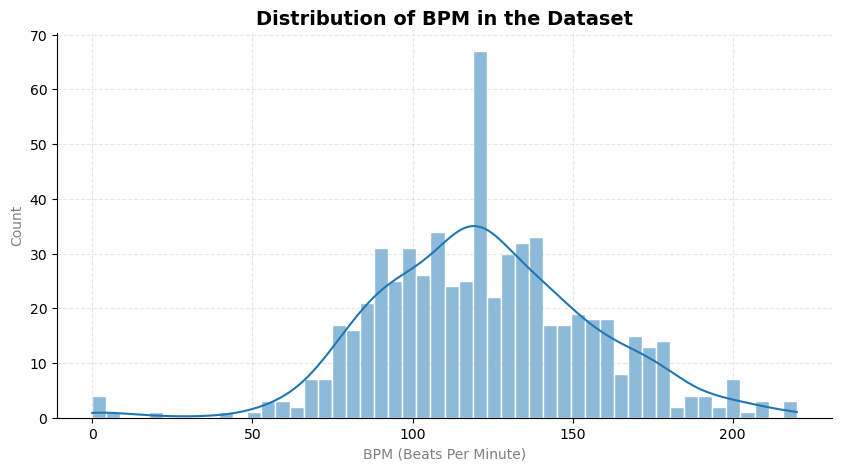

In [12]:
# Checking the BPM distribution
bpm = df[df['bpm'] < 300]

plt.figure(figsize=(10, 5))
sns.histplot(bpm['bpm'], bins=50, kde=True, edgecolor="white")
plt.xlabel("BPM (Beats Per Minute)", color='gray')
plt.ylabel("Count", color='gray')
plt.title("Distribution of BPM in the Dataset", fontsize=14, fontweight="bold")
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.show()


Let's see which genres have missing values (NaN) in the 'bpm' column

In [13]:
# Count the total number of tracks by genre
genre_counts = df['fav_genre'].value_counts().rename("total_tracks")

# Count the number of missing BPM values by genre
missing_counts = df[df['bpm'].isna()].groupby('fav_genre').size().rename("missing_bpm_count")

# Combine data into a single DataFrame
summary_df = pd.concat([genre_counts, missing_counts], axis=1).fillna(0)

# Convert the number of missing values to integers
summary_df["missing_bpm_count"] = summary_df["missing_bpm_count"].astype(int)

# Add a column with the percentage of missing values (rounded to 2 decimal places and formatted as a percentage)
summary_df["missing_percentage"] = (
    (summary_df["missing_bpm_count"] / summary_df["total_tracks"]) * 100
).round(2).astype(str) + "%"

# Reset index and rename columns
summary_df = summary_df.reset_index().rename(columns={"index": "genre"})

# Display the final table
summary_df


,fav_genre,total_tracks,missing_bpm_count,missing_percentage
0,Rock,188,37,19.68%
1,Pop,114,17,14.91%
2,Metal,88,10,11.36%
3,Classical,53,13,24.53%
4,Video game music,44,7,15.91%
5,EDM,37,1,2.7%
6,R&B,35,5,14.29%
7,Hip hop,35,3,8.57%
8,Folk,30,4,13.33%
9,K pop,26,1,3.85%


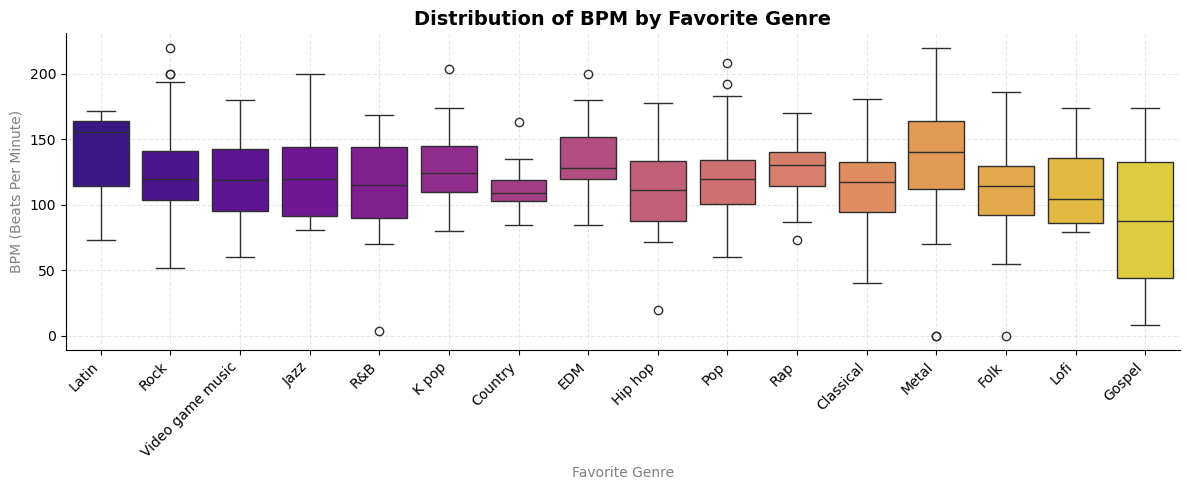

In [14]:
plt.figure(figsize=(12, 5))

# Create a Plasma palette for each genre
palette = sns.color_palette("plasma", n_colors=df["fav_genre"].nunique())

# Plot a boxplot using hue to assign different colors to each genre
sns.boxplot(data=df, x='fav_genre', y='bpm', hue='fav_genre', palette=palette, legend=False)

# Improve graph readability
plt.xticks(rotation=45, ha='right')
plt.xlabel("Favorite Genre", color='gray')
plt.ylabel("BPM (Beats Per Minute)", color='gray')
plt.title("Distribution of BPM by Favorite Genre", fontsize=14, fontweight="bold")
plt.grid(True, linestyle='--', alpha=0.3)

sns.despine()
plt.tight_layout()
plt.show()


Since BPM (beats per minute) is highly dependent on the genre, we will fill the missing values using the **median BPM within each genre** instead of the mode.  

The **Gospel** genre requires special attention. It has only **6 values**, with **2 missing**. In this case, it is better to use a **standard BPM** for tracks in this style.  

Most **Gospel** music falls within the **80-120 BPM** range, though slower tracks (50-80 BPM) and faster ones (120-160 BPM) also exist. As a **general estimate**, we can use **90 or 100 BPM**.

In [15]:
# Suppose we choose 90 BPM as the standard for filling in missing values in the Gospel genre.
df.loc[(df['fav_genre'] == 'Gospel') & (df['bpm'].isna()), 'bpm'] = 90

In [16]:
df['bpm'] = df.groupby('fav_genre')['bpm'].transform(
    lambda x: x.fillna(
        x.mode().iloc[0] if not x.mode().empty else x.median()
    )
)


Checking for missing values

In [17]:
df.isna().sum()

timestamp                     0
age                           0
primary_streaming_service     0
hours_per_day                 0
while_working                 0
instrumentalist               0
composer                      0
fav_genre                     0
exploratory                   0
foreign_languages             0
bpm                           0
frequency_classical           0
frequency_country             0
frequency_edm                 0
frequency_folk                0
frequency_gospel              0
frequency_hip_hop             0
frequency_jazz                0
frequency_k_pop               0
frequency_latin               0
frequency_lofi                0
frequency_metal               0
frequency_pop                 0
frequency_rnb                 0
frequency_rap                 0
frequency_rock                0
frequency_video_game_music    0
anxiety                       0
depression                    0
insomnia                      0
ocd                           0
music_ef

There are no missing values!

#### Processing the 'BPM' Column  

The dataset contains **BPM values close to zero**, which seem unrealistic. We will replace such values with the **median BPM of the respective genre**.

In [18]:
df.loc[df['bpm'] <= 25, 'bpm'] = df.groupby('fav_genre')['bpm'].transform('median')


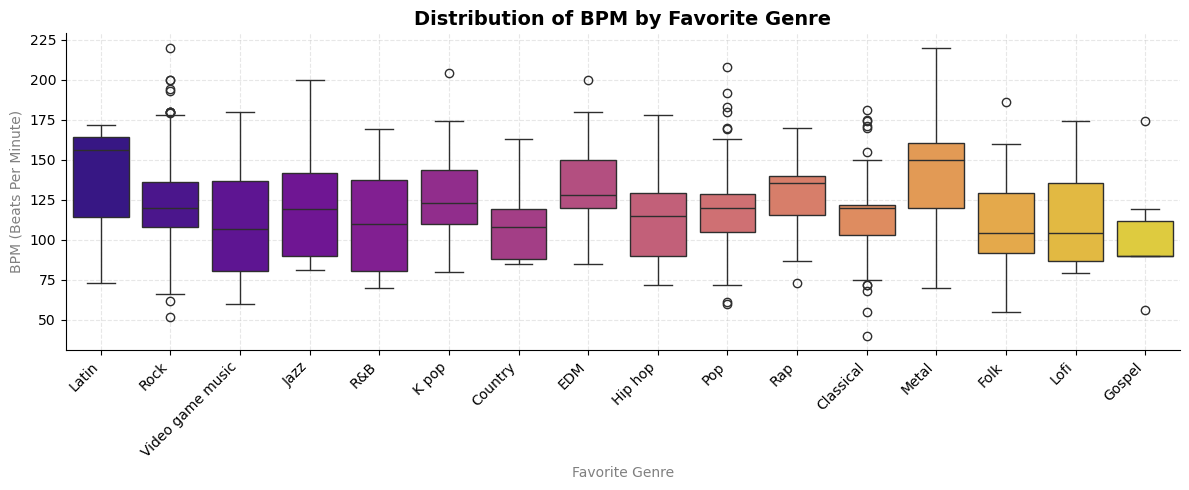

In [19]:
plt.figure(figsize=(12, 5))

# Plot a boxplot using hue to assign different colors to each genre
sns.boxplot(data=df, x='fav_genre', y='bpm', hue='fav_genre', palette=palette, legend=False)

# Improve graph readability
plt.xticks(rotation=45, ha='right')
plt.xlabel("Favorite Genre", color='gray')
plt.ylabel("BPM (Beats Per Minute)", color='gray')
plt.title("Distribution of BPM by Favorite Genre", fontsize=14, fontweight="bold")
plt.grid(True, linestyle='--', alpha=0.3)

sns.despine()
plt.tight_layout()
plt.show()


#### Data type conversion

In [20]:
# Convert date to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [21]:
# Convert the “Yes/No” columns to True-False
# List of columns with “Yes/No” responses
yes_no_cols = [
    'while_working', 
    'instrumentalist', 
    'composer', 
    'exploratory', 
    'foreign_languages'
]

# Define mapping for transformation
mapping = {'Yes': True, 'No': False}

# Apply transformation to each column
for col in yes_no_cols:
    df[col] = df[col].map(mapping)


In [22]:
# Convert columns with numeric values from float to int  
# List of columns that can be converted to integer values  
numeric_cols = ['age', 'hours_per_day', 'bpm', 'anxiety', 'depression', 'insomnia', 'ocd']

# Convert each column to int type  
for col in numeric_cols:
    df[col] = df[col].astype(int)


In [23]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   736 non-null    datetime64[ns]
 1   age                         736 non-null    int32         
 2   primary_streaming_service   736 non-null    object        
 3   hours_per_day               736 non-null    int32         
 4   while_working               736 non-null    bool          
 5   instrumentalist             736 non-null    bool          
 6   composer                    736 non-null    bool          
 7   fav_genre                   736 non-null    object        
 8   exploratory                 736 non-null    bool          
 9   foreign_languages           736 non-null    bool          
 10  bpm                         736 non-null    int32         
 11  frequency_classical         736 non-null    object        

In [24]:
df['music_effects'].unique()

array(['Improve', 'No effect', 'Worsen'], dtype=object)

In [25]:
df['permissions'].unique()

array(['I understand.'], dtype=object)

In [26]:
# Преобразуем в True-False
df['permissions'] = df['permissions'] == 'I understand.'

**Summary of Data Processing**  

1. **Column Renaming** – Standardized names to `snake_case` for easier handling.  
2. **Handling Missing Values**:  
   - Filled **most** missing values with the **mode**.  
   - In **BPM**, missing values were filled with the **median within each genre**.  
   - For **Gospel** (small dataset), a standard BPM of **90** was assigned.  
3. **BPM Anomalies** – Values close to **0 were replaced** with the genre median.  
4. **Data Type Conversion**:  
   - `Timestamp` → `datetime`.  
   - `Yes/No` columns → `True/False`.  
   - Numeric data (`Age`, `Hours per day`, `BPM`, `Anxiety`, etc.) → `int`.  
   - `permissions` converted to `True/False`.  

The data is now **standardized, cleaned from missing values and anomalies**, and ready for analysis. 🚀

## Exploratory data analysis

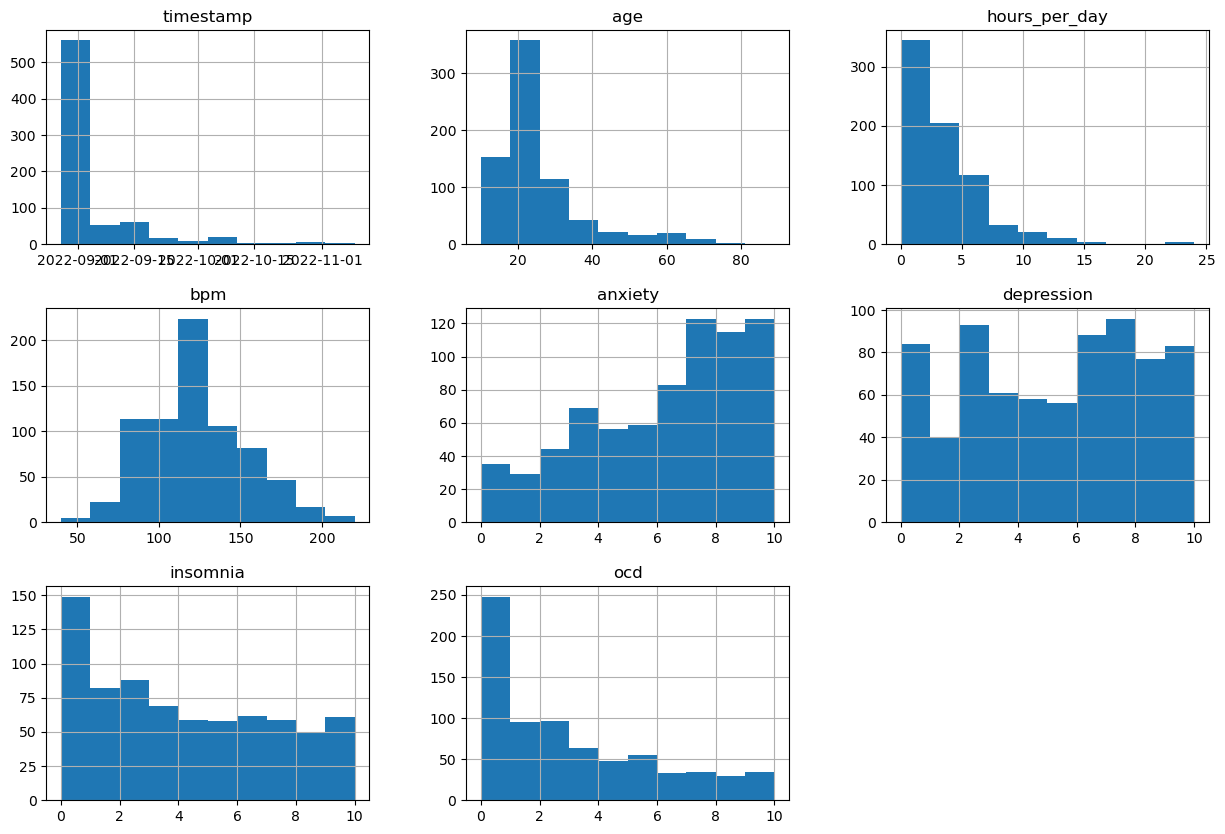

In [27]:
df.hist(figsize=(15, 10));

In [28]:
print('The earliest date:', df['timestamp'].min())
print('The latiest date:', df['timestamp'].max())

The earliest date: 2022-08-27 19:29:02
The latiest date: 2022-11-09 01:55:20


The data cover the period **from late August through early November 2022** (~2.5 months).


### Musical preferences and habits


#### Demographics data and music habits

Let's analyze the distribution of age and number of listening hours per day.
Identify the main streaming services used by respondents.

In [29]:
# Descriptive Statistics  
age_stats = df['age'].describe()  
hours_stats = df['hours_per_day'].describe()  
streaming_counts = df['primary_streaming_service'].value_counts()  

print("Age Statistics:")  
print(age_stats)  

print("\nListening Hours per Day Statistics:")  
print(hours_stats)  

print("\nDistribution of Streaming Services:")  
streaming_counts  


Age Statistics:
count    736.000000
mean      25.197011
std       12.049695
min       10.000000
25%       18.000000
50%       21.000000
75%       28.000000
max       89.000000
Name: age, dtype: float64

Listening Hours per Day Statistics:
count    736.000000
mean       3.540761
std        3.055669
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       24.000000
Name: hours_per_day, dtype: float64

Distribution of Streaming Services:


primary_streaming_service
Spotify                              459
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count, dtype: int64

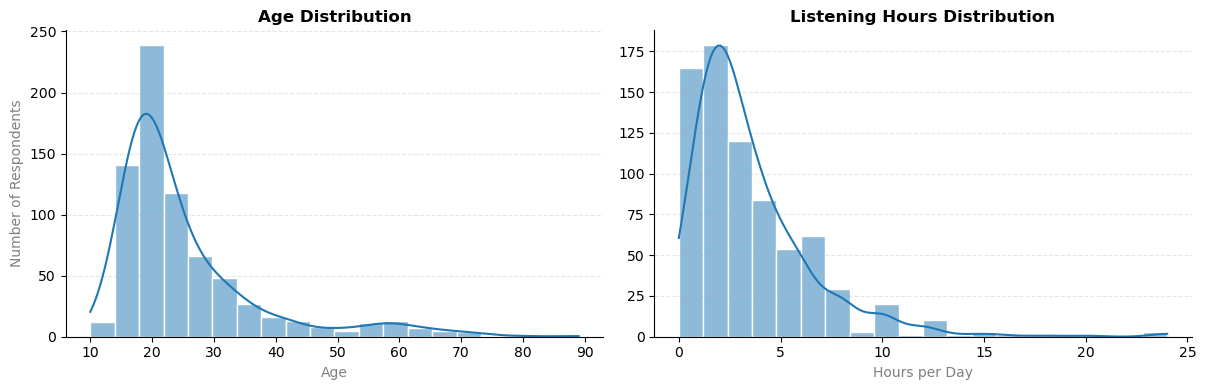

In [30]:
plt.figure(figsize=(18, 4))

# First plot (Age distribution)
ax1 = plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, edgecolor="white", bins=20, ax=ax1)
ax1.set_title("Age Distribution", fontweight='bold')
ax1.set_xlabel("Age", color='gray')
ax1.set_ylabel("Number of Respondents", color='gray')
ax1.grid(axis="y", linestyle="--", alpha=0.3)

# Second plot (Listening hours per day)
ax2 = plt.subplot(1, 3, 2)
sns.histplot(df['hours_per_day'], kde=True, edgecolor="white", bins=20, ax=ax2)
ax2.set_title("Listening Hours Distribution", fontweight='bold')
ax2.set_xlabel("Hours per Day", color='gray')
ax2.set_ylabel("")  # Remove Y-axis label
ax2.grid(axis="y", linestyle="--", alpha=0.3)

sns.despine()
plt.tight_layout()
plt.show()


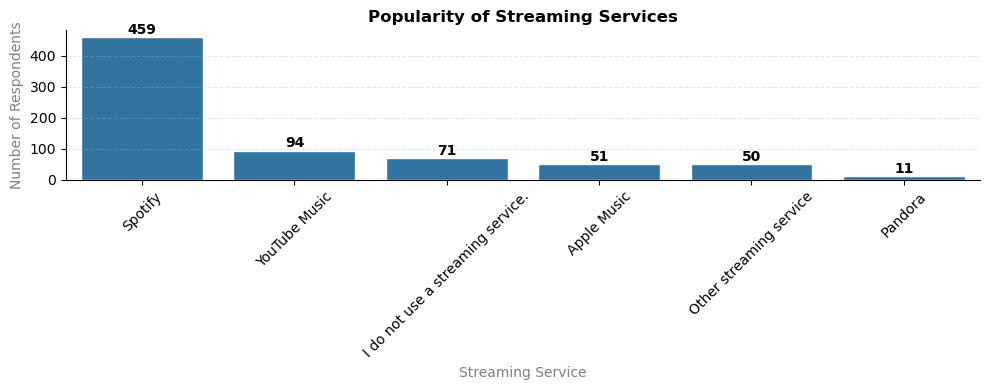

In [31]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(
    data=df, 
    x='primary_streaming_service', 
    edgecolor="white", 
    order=streaming_counts.index
)
plt.title("Popularity of Streaming Services", fontweight='bold')
plt.xlabel("Streaming Service", color='gray')
plt.ylabel("Number of Respondents", color='gray')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Add numerical labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height + 1),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

sns.despine()
plt.tight_layout()
plt.show()


1. **Age**   
   - The average age of respondents is around **25 years**, with a median of **21 years**.  
   - Most participants are young adults (interquartile range from 18 to 28 years).  
   - There are also older participants (maximum age — 89 years), but they are significantly fewer (distribution with a "long tail").  
>

2. **Listening Hours**  
   - On average, respondents listen to music for **3.5 hours per day**, with a median of **3 hours**.  
   - Most fall within the range of 2 to 5 hours, but some listen for **10+ hours** per day (values up to 24 hours).  
>

3. **Streaming Services**  
   - **Spotify** is the most popular service (used by more than 60% of respondents).  
   - **YouTube Music** and **Apple Music** follow in popularity.  
   - Around 10% of respondents do not use streaming services at all, likely preferring other ways of listening (local files, radio, etc.).  

Thus, the **typical** respondent is **under 30 years old**, listens to music for several hours a day, and **prefers Spotify** as their primary streaming service.

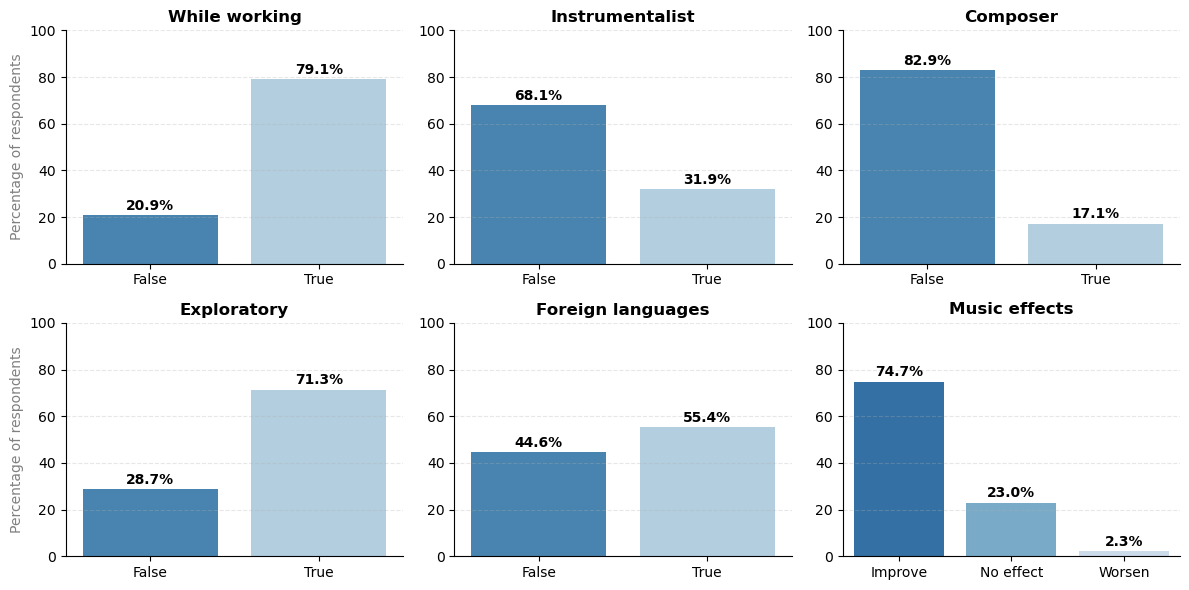

In [32]:
# List of columns with binary (Yes/No) responses
binary_columns = ["while_working", "instrumentalist", "composer", 
                  "exploratory", "foreign_languages", "music_effects"]

# Determine the number of columns per row (2 rows)
n = len(binary_columns)
ncols = math.ceil(n / 2)  # Number of plots in a single row

# Create a figure for the plots (2 rows, ncols columns)
fig, axes = plt.subplots(2, ncols, figsize=(ncols * 4, 6))
axes = axes.flatten()  # Flatten for easy iteration

# Generate plots for each column
for i, col in enumerate(binary_columns):
    ax = axes[i]
    # Calculate percentages
    counts = df[col].value_counts(normalize=True).mul(100).sort_values(ascending=False)
    # Convert to DataFrame
    data = counts.reset_index()
    data.columns = [col, 'Percentage']
    
    # Create bar plot with hue for different colors
    sns.barplot(data=data, x=col, y='Percentage', hue=col, ax=ax, 
                legend=False, palette="Blues_r")
    
    # Add percentage labels above bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height() + 1), 
                    ha='center', va='bottom', fontsize=10, 
                    fontweight='bold', color='black')
    
    # Configure plot
    ax.set_title(col.replace("_", " ").capitalize(), fontsize=12, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Display Y-axis label ("Percentage of respondents") only for the leftmost plot in each row
    if i % ncols == 0:
        ax.set_ylabel("Percentage of respondents", color='gray', fontsize=10)
    else:
        ax.set_ylabel("")

# Remove any extra axes if they exceed the required number
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()


- **Listen to music while working/studying** – 79.1% answered "Yes", 20.9% "No".  
- **Play a musical instrument** – 68.1% "No", 31.9% "Yes".  
- **Compose music** – 82.9% "No", 17.1% "Yes".  
- **Actively explore new genres/artists** – 71.3% "Yes", 28.7% "No".  
- **Listen to music in foreign languages** – 55.4% "Yes", 44.6% "No".  
- **Impact of music on mental state** – for 74.7%, music "improves" their condition, 23.0% notice no effect, and for 2.3%, it "worsens" their state.

#### Distribution of favorite genres
Let's see what genres respondents prefer and how popular they are.

In [33]:
df['fav_genre'].value_counts().to_frame()

,count
fav_genre,
Rock,188
Pop,114
Metal,88
Classical,53
Video game music,44
EDM,37
R&B,35
Hip hop,35
Folk,30


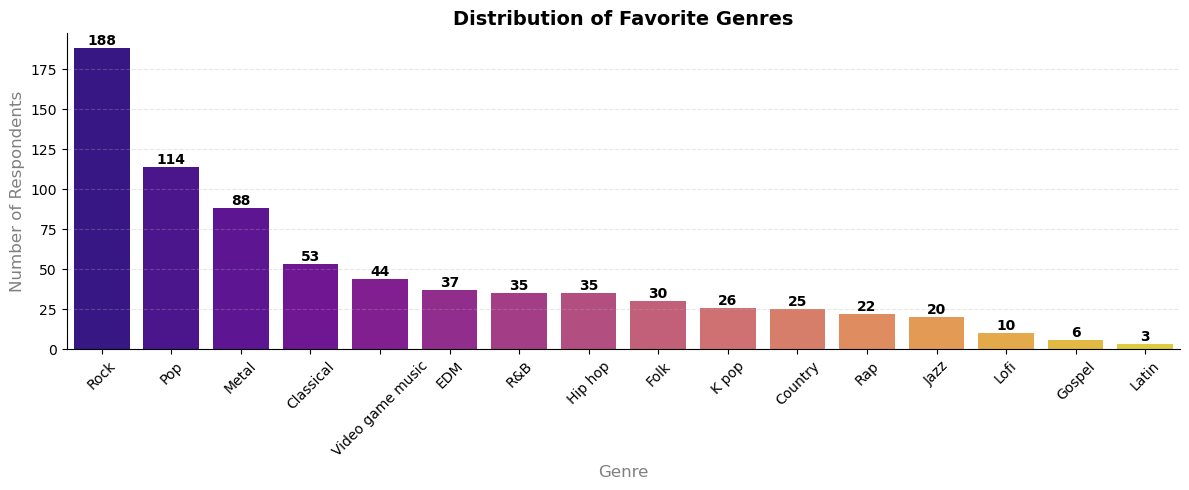

In [34]:
plt.figure(figsize=(12, 5))

# Get the number of respondents for each genre
genre_counts = df["fav_genre"].value_counts()

# Create a gradient from dark purple to yellow
n_colors = len(genre_counts)
gradient = sns.color_palette("plasma", n_colors) 

# Plot the bar chart while addressing the warning
ax = sns.barplot(
    x=genre_counts.index, y=genre_counts.values, 
    hue=genre_counts.index, palette=gradient, legend=False  
)

# Add numerical labels above bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, 
                fontweight='bold', color='black')

# Chart settings
plt.title("Distribution of Favorite Genres", fontsize=14, fontweight="bold")
plt.xlabel("Genre", fontsize=12, color='gray')
plt.ylabel("Number of Respondents", fontsize=12, color='gray')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()




- **Rock** is the most popular genre, chosen by **188** respondents.  
- **Pop** ranks second with **114** mentions.  
- **Metal** holds third place (around **88** respondents).  
- Following are **Classical** (53), **Video Game Music** (47), **EDM** (37), and **R&B** (35).  
- **Hip Hop** (30) and **Folk** (29) are at a similar level.  
- At the lower end of the ranking: **K-pop** (26), **Country** (25), **Rap** (22), **Jazz** (20), **Lofi** (16), **Gospel** (6), and **Latin** (3).  

Thus, the most favored genres among respondents are **Rock** and **Pop**, while **Latin** and **Gospel** are the least common.

In [35]:
# Looking at key statistics by age
df.groupby("fav_genre")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
fav_genre,,,,,,,,
Classical,53.0,26.226415,15.560850,12.0,16.00,20.0,31.00,80.0
Country,25.0,25.360000,11.739818,14.0,19.00,21.0,29.00,70.0
EDM,37.0,22.054054,6.540243,15.0,18.00,20.0,25.00,49.0
Folk,30.0,25.800000,8.918791,13.0,21.00,23.5,29.75,49.0
Gospel,6.0,55.666667,19.211108,18.0,57.75,60.0,66.00,71.0
Hip hop,35.0,23.285714,8.709601,15.0,18.00,20.0,26.50,58.0
Jazz,20.0,25.450000,12.193506,14.0,18.00,22.5,26.25,61.0
K pop,26.0,18.423077,3.061674,14.0,16.25,18.0,19.00,30.0
Latin,3.0,17.666667,0.577350,17.0,17.50,18.0,18.00,18.0


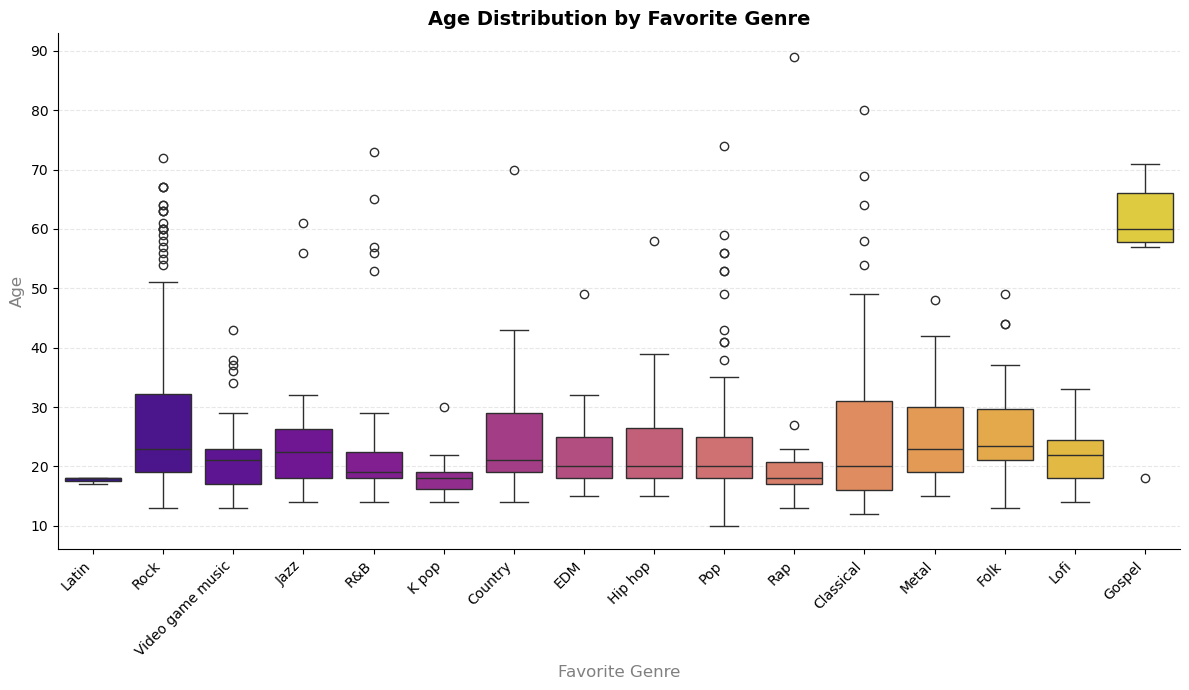

In [36]:
plt.figure(figsize=(12, 7))

# Plot the boxplot with corrected hue
sns.boxplot(data=df, x='fav_genre', y='age', hue='fav_genre', palette=palette, legend=False)

# Chart settings
plt.title("Age Distribution by Favorite Genre", fontsize=14, fontweight="bold")
plt.xlabel("Favorite Genre", fontsize=12, color='gray')
plt.ylabel("Age", fontsize=12, color='gray')
plt.xticks(rotation=45, ha='right')  # Rotate X-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine()
plt.tight_layout()
plt.show()




- **Rock** (**188** respondents, median age **23**) and **Pop** (**114** respondents, median age **20**) are the most popular genres. While both have a mix of younger and older listeners, their primary audience consists of young and middle-aged individuals.  
- The youngest listeners are found in **Rap (median 18), K-pop (18), and R&B (19)**.  
- **Metal (88 respondents, median 23)**, **Classical (53, median 20)**, and **Video Game Music (44, median 21)** show a wide age distribution.  
  - **Classical** has more older listeners compared to EDM or Hip Hop.  
  - **Metal** is relatively evenly distributed across different age groups.  
- The oldest median ages are found in **Gospel (60 years, 6 respondents) and Latin (18 years, 3 respondents)**, but the sample size is too small for definitive conclusions.  
- Genres with a small sample size (**Gospel, Latin, Lofi, Jazz**) are harder to interpret, as the limited number of respondents may skew the statistics.  

Genres **Rock and Pop** have the **widest age range**, though their audience is predominantly young. The youngest listeners are in **K-pop and Rap**, while **Gospel and Classical** attract older respondents.

#### BPM Distribution by Genre
Since **BPM (beats per minute)** may vary by genre, let's examine the statistics and create a *boxplot* for BPM across genres. This visualization will help assess the **median, value dispersion, and identify outliers** for each genre.

In [37]:
# Looking at the stats by genre
df.groupby("fav_genre")["bpm"].describe()

,count,mean,std,min,25%,50%,75%,max
fav_genre,,,,,,,,
Classical,53.0,115.905660,29.609162,40.0,103.00,120.0,122.00,181.0
Country,25.0,106.640000,18.725829,85.0,88.00,108.0,119.00,163.0
EDM,37.0,133.459459,28.037271,85.0,120.00,128.0,150.00,200.0
Folk,30.0,110.666667,28.060690,55.0,92.00,104.5,129.50,186.0
Gospel,6.0,103.166667,40.032070,56.0,90.00,90.0,111.75,174.0
Hip hop,35.0,115.314286,28.673385,72.0,90.00,115.0,129.00,178.0
Jazz,20.0,122.750000,36.757921,81.0,90.00,119.0,142.00,200.0
K pop,26.0,127.461538,28.560435,80.0,110.00,123.0,143.75,204.0
Latin,3.0,133.666667,53.144457,73.0,114.50,156.0,164.00,172.0


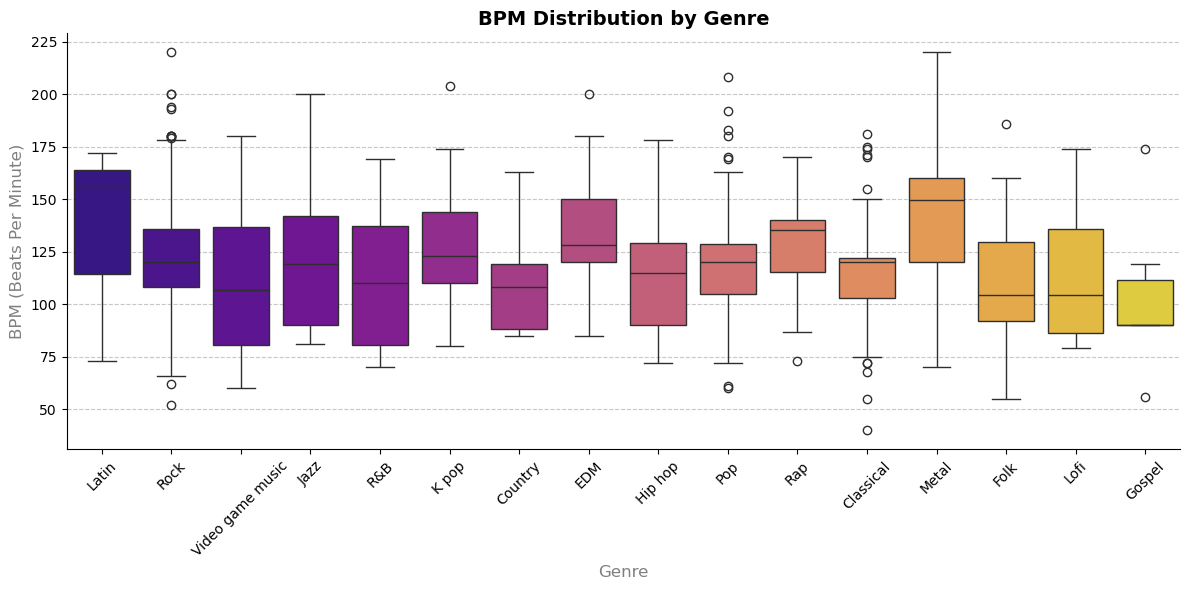

In [38]:
plt.figure(figsize=(12, 6))

# Set hue=x and disable legend as suggested by the warning
sns.boxplot(data=df, x='fav_genre', y='bpm', hue='fav_genre', palette=palette, legend=False)

plt.title("BPM Distribution by Genre", fontsize=14, fontweight="bold")
plt.xlabel("Genre", fontsize=12, color='gray')
plt.ylabel("BPM (Beats Per Minute)", fontsize=12, color='gray')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()



- The **fastest** genres are **Latin** (median **156** BPM) and **Metal** (median **150** BPM).  
- **Rap** and **EDM** also tend toward relatively high tempos (median above **125** BPM). **Rock**, **Classical**, **Jazz**, **Pop**, and **Hip Hop** exhibit **standard median BPM values** (around **120** beats per minute). However, **Classical** and **Rock** show a wide range, including faster compositions.  
- **Country**, **Video Game Music**, and **R&B** fall within the **medium range** (approximately **90–110** BPM).  
- **Folk**, **Lofi**, and **Gospel** are the **slowest** by median BPM (around **100** BPM).  
- **Outliers** (points beyond the "whiskers") indicate that within each genre, there are tracks with **unusually high or low tempos** compared to the majority.  

Thus, BPM within a genre can vary significantly among respondents. However, **Latin and Metal** exhibit the **fastest** tempos, while **Folk and Gospel** have the **slowest**.

#### Distribution of Listening Frequency for Different Genres 

The dataset contains columns such as *frequency_classical, frequency_country*, etc., which indicate how often respondents listen to different genres. Let's visualize the listening frequency distribution for each genre separately.

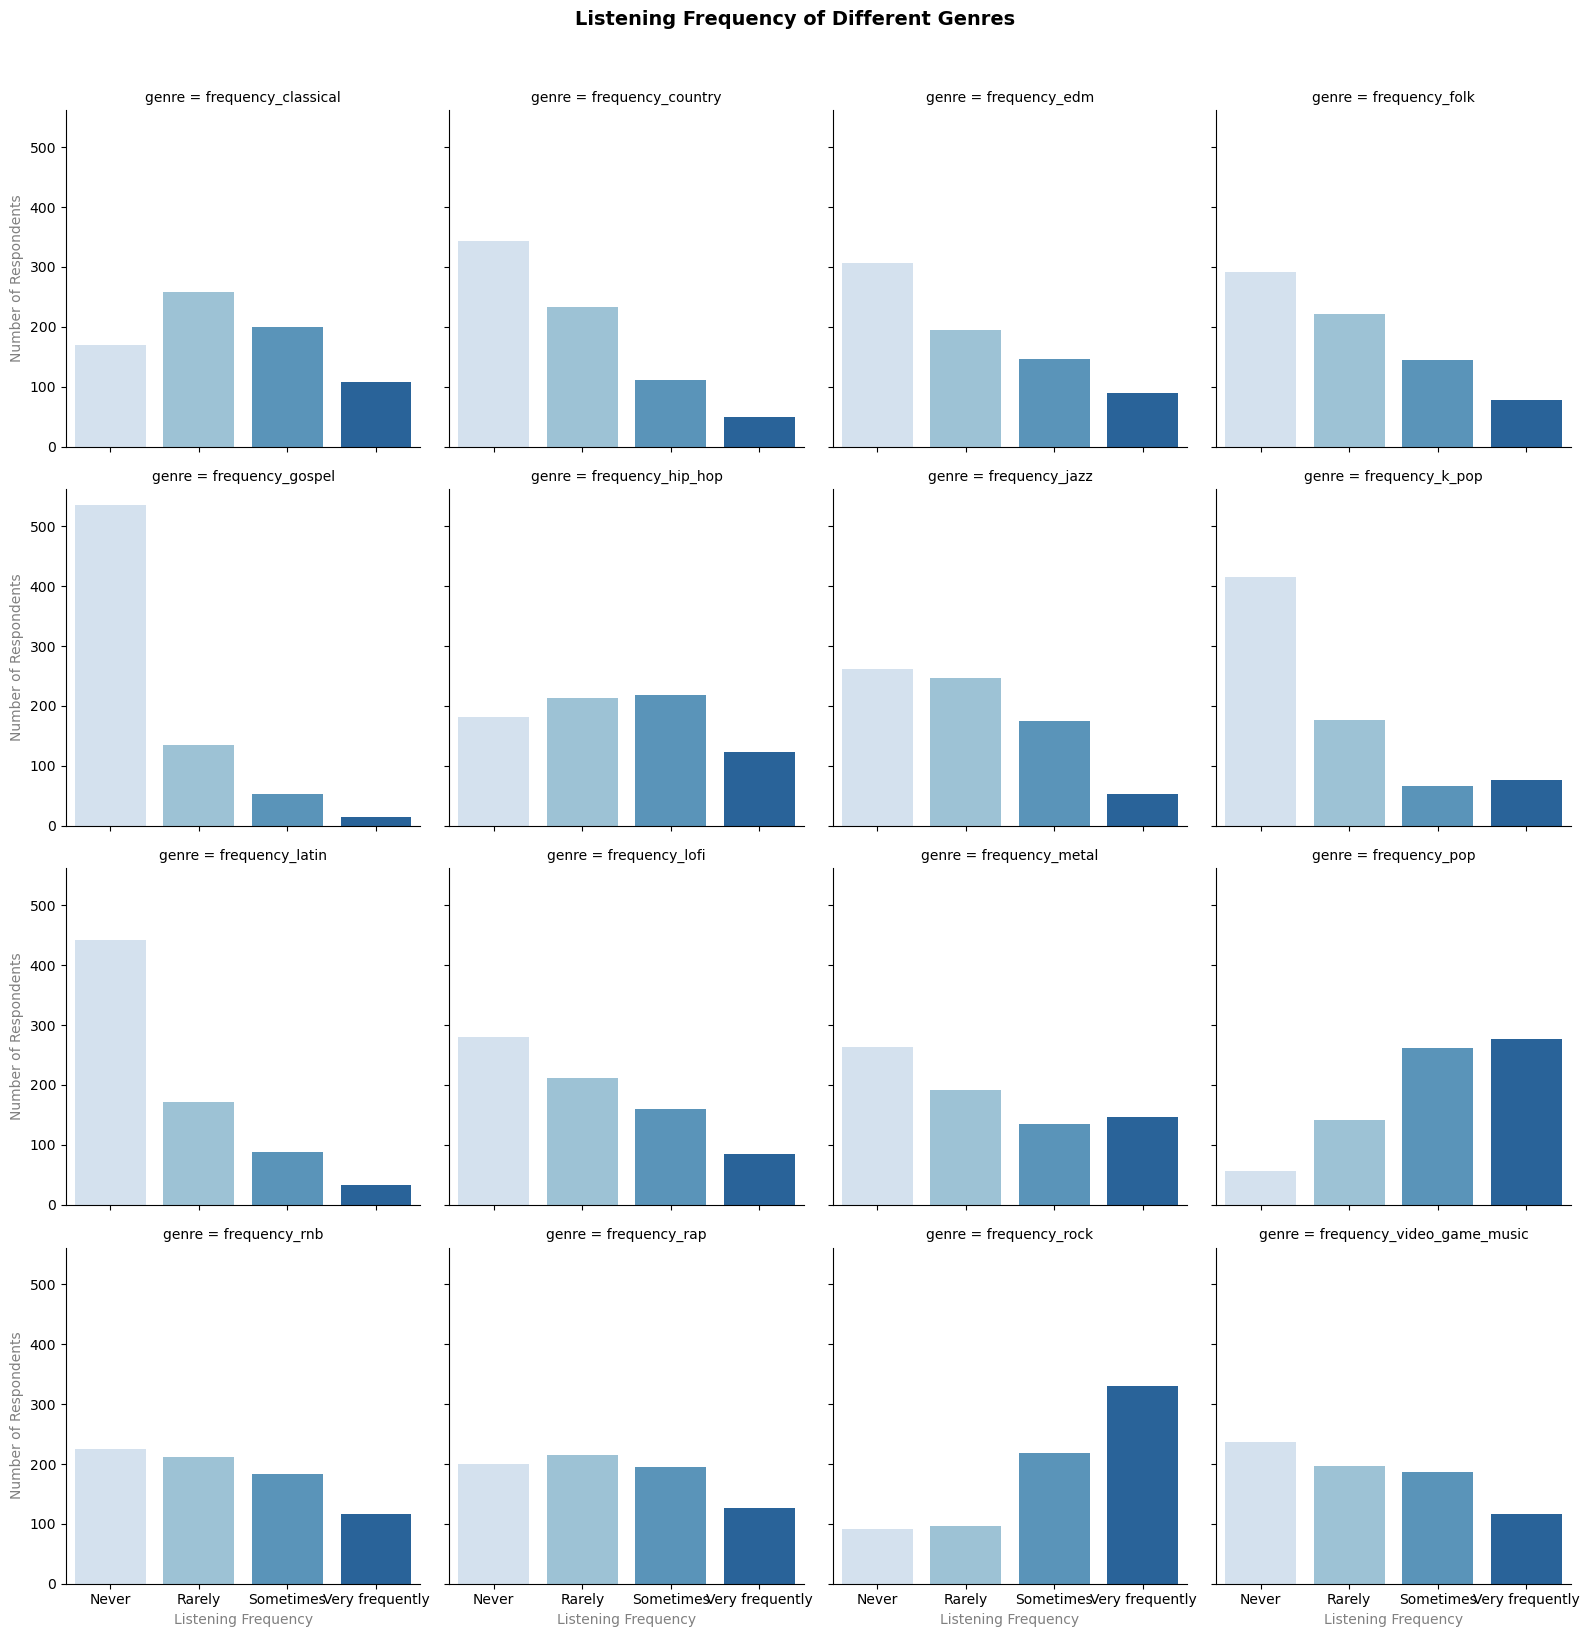

In [39]:
# Define columns that start with 'frequency_'
frequency_cols = [col for col in df.columns if col.startswith('frequency_')]

# Convert data to long format
df_freq = df.melt(value_vars=frequency_cols, var_name='genre', value_name='frequency')

# Set a custom palette: map frequency levels to specific colors
# sns.color_palette("Blues", 4) provides colors from lightest to darkest
custom_palette = dict(zip(
    ["Never", "Rarely", "Sometimes", "Very frequently"],
    sns.color_palette("Blues", 4)
))

# Plot the distribution for each genre using catplot
# Explicitly setting hue and applying the custom palette
g = sns.catplot(
    data=df_freq,
    x='frequency', hue='frequency',
    col='genre', kind='count',
    col_wrap=4, height=4, aspect=1,
    order=["Never", "Rarely", "Sometimes", "Very frequently"],
    palette=custom_palette,
    legend=False
)

g.fig.suptitle("Listening Frequency of Different Genres", fontsize=14, fontweight="bold", y=1.02)
g.set_axis_labels("Listening Frequency", "Number of Respondents", color='gray')
plt.tight_layout()
plt.show()



- **Rock and Pop** are the most frequently listened genres, with a high percentage of respondents selecting **"Very frequently"** and **"Sometimes"**.  
- **Metal, Rap, and Hip-Hop** also have a significant share of respondents who listen to them **"Sometimes"** or **"Very frequently"**.  
- **Classical, Jazz, and R&B** show a more **balanced distribution**, with many respondents choosing **"Sometimes"** or **"Rarely"**.  
- **Gospel, Latin, K-pop, and Lofi** are most commonly found in the **"Never"** or **"Rarely"** categories, indicating lower popularity among survey participants. **Country, EDM, Folk, and Jazz** are also not very popular but have a relatively larger audience overall.  
- **R&B and Video Game Music** are evenly distributed among **"Never"**, **"Rarely"**, and **"Sometimes"**, but have a lower percentage of **"Very frequently"** responses compared to **Rock or Pop**.  

Overall, the most **widely listened** genres (**Rock, Pop, and Metal**) have a high proportion of regular listeners, while **Gospel, Latin, Lofi**, and some other genres remain **more niche**.

### Mental Health

We will analyze self-reported levels of **anxiety, depression, insomnia, and OCD** by examining their **mean values, medians, and distributions**.  

Calculating key statistical metrics will help us understand the overall levels and variability of self-assessments for each indicator.

In [40]:
# Descriptive Statistics
mental_cols = ['anxiety', 'depression', 'insomnia', 'ocd']

print("Key Statistics for Mental Health Indicators:")
df[mental_cols].describe()

Key Statistics for Mental Health Indicators:


,anxiety,depression,insomnia,ocd
count,736.000000,736.000000,736.000000,736.000000
mean,5.836957,4.794837,3.737772,2.635870
std,2.792710,3.029564,3.088797,2.840047
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,1.000000,0.000000
50%,6.000000,5.000000,3.000000,2.000000
75%,8.000000,7.000000,6.000000,5.000000
max,10.000000,10.000000,10.000000,10.000000


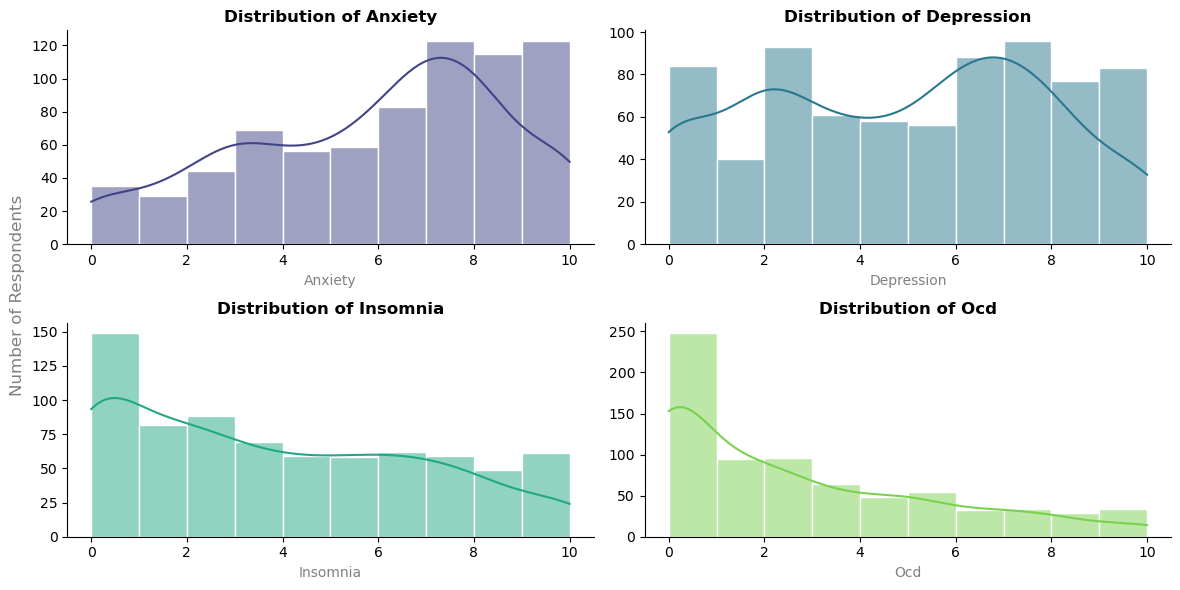

In [41]:
# Create a figure and axes for 2x2 plots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Define a Viridis palette for each mental health indicator
palette = sns.color_palette("viridis", len(mental_cols))

# Plot histograms for each indicator
for ax, (col, color) in zip(axes.flatten(), zip(mental_cols, palette)):
    sns.histplot(df[col], kde=True, bins=10, edgecolor="white", color=color, ax=ax)
    ax.set_title(f"Distribution of {col.capitalize()}", fontweight="bold")
    ax.set_xlabel(col.capitalize(), color='gray')
    # Remove individual Y-axis labels
    ax.set_ylabel("")

# Add a single Y-axis label for the entire figure
fig.supylabel("Number of Respondents", color='gray')

sns.despine()
plt.tight_layout()
plt.show()



- The highest average values are observed for **Anxiety** (**5.84**) and **Depression** (**4.79**), with medians of **6** and **5**, respectively.  
- **Insomnia** has an average of **3.74** (median **3**), while **OCD** is at **2.64** (median **2**).  
- All four indicators range from **0 to 10**, with **75%** of respondents reporting **Anxiety** of at least **4** and **Depression** of at least **2**.  
- Standard deviations (**around 2.8–3.1**) indicate a significant variation in responses for each parameter.тру.

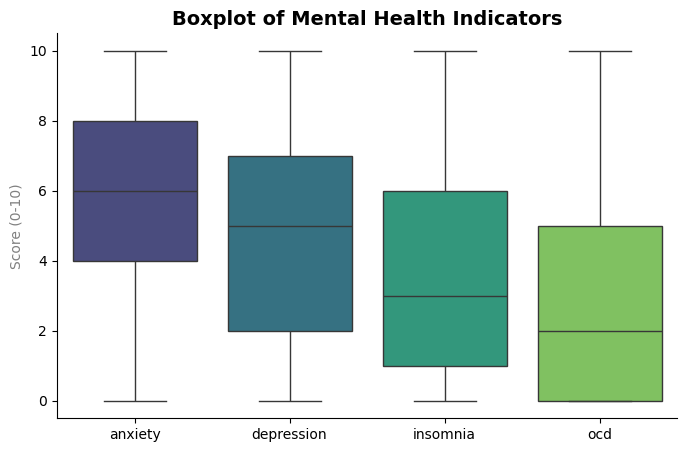

In [69]:
# Boxplot for Comparing Mental Health Scores Across All Categories  
plt.figure(figsize=(8, 5))  
sns.boxplot(data=df[mental_cols], palette="viridis")  
plt.title("Boxplot of Mental Health Indicators", fontsize=14, fontweight="bold")  
plt.ylabel("Score (0-10)", color='gray')  

sns.despine()  
plt.show()


- **Anxiety** has the highest median (**around 6**), while **OCD** has the lowest (**around 2**).  
- **Depression** falls in the middle with a median of **5**, and **Insomnia** at **3**.  
- All four indicators show a **wide range (0 to 10)**, indicating **high variability** in self-reported assessments among respondents.

We will build a **correlation matrix** for **anxiety, depression, insomnia, and OCD**.  

This will help determine whether strong linear relationships exist between different conditions (for example, whether people with **high anxiety levels** also tend to have **high depression scores**).

In [43]:
# Correlation Analysis
corr_matrix = df[mental_cols].corr()
print("\nCorrelation Matrix:")
corr_matrix



Correlation Matrix:


,anxiety,depression,insomnia,ocd
anxiety,1.000000,0.519470,0.292346,0.347932
depression,0.519470,1.000000,0.378953,0.196397
insomnia,0.292346,0.378953,1.000000,0.226085
ocd,0.347932,0.196397,0.226085,1.000000


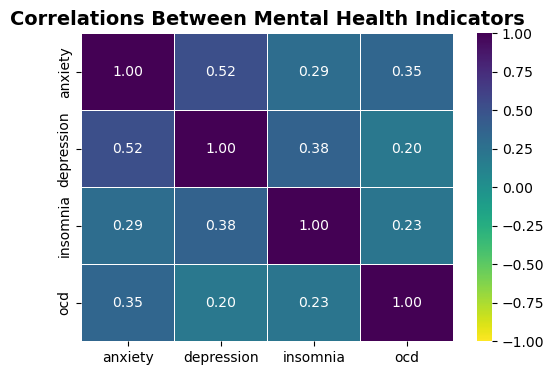

In [44]:
# Visualization of the Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="viridis_r", vmin=-1, 
            vmax=1, linewidths=0.5, fmt=".2f")
plt.title("Correlations Between Mental Health Indicators", 
          fontsize=14, fontweight="bold")
plt.show()


- **Anxiety** and **Depression** have the strongest correlation (**0.52**).  
- **Depression** and **Insomnia** show a noticeable correlation (**0.38**).  
- **Anxiety** and **OCD** correlate at **0.35**, while **Insomnia** and **OCD** have a correlation of **0.23**.  
- All coefficients indicate a **moderate** relationship, with no extremely high values.ий.

## Interrelationship research

### Correlation Analysis

We will calculate the correlations between **musical parameters** (favorite genre, BPM, listening hours) and **mental health indicators**.

In [45]:
# Define column lists
music_vars = ['bpm', 'hours_per_day']

# Convert 'fav_genre' into dummy variables
genre_dummies = pd.get_dummies(df['fav_genre'], prefix='genre')

# Create a dataframe for correlation analysis
df_corr = pd.concat([df[music_vars], genre_dummies, df[mental_cols]], axis=1)

# Compute the correlation matrix
corr_matrix = df_corr.corr()

# To display correlations between musical parameters (and genres) and mental health indicators:
# extract rows corresponding to mental_cols and columns corresponding to music_vars + genres
cols_of_interest = music_vars + list(genre_dummies.columns)
correlation_of_interest = corr_matrix[cols_of_interest].loc[mental_cols]

print("Correlations Between Musical Parameters and Genres with Mental Health Indicators:")
correlation_of_interest

Correlations Between Musical Parameters and Genres with Mental Health Indicators:


,bpm,hours_per_day,genre_Classical,genre_Country,genre_EDM,genre_Folk,genre_Gospel,genre_Hip hop,genre_Jazz,genre_K pop,genre_Latin,genre_Lofi,genre_Metal,genre_Pop,genre_R&B,genre_Rap,genre_Rock,genre_Video game music
anxiety,0.078815,0.048929,-0.094841,-0.029359,-0.028892,0.053899,-0.032603,0.029067,0.003775,0.027003,-0.034468,0.011062,-0.009982,0.035776,-0.053286,-0.046924,0.059895,0.004464
depression,0.062755,0.111352,-0.066190,-0.029410,0.034076,0.018508,-0.063729,0.074187,-0.016276,-0.023498,-0.037927,0.069978,0.033272,-0.044173,-0.071316,-0.046085,0.084971,-0.026450
insomnia,0.075128,0.143050,0.004935,-0.061829,0.017531,-0.006975,0.046863,-0.022383,0.006077,-0.017125,-0.008382,0.070806,0.097784,-0.051227,-0.061681,-0.083314,0.026544,0.021422
ocd,-0.006285,0.119609,-0.025373,0.008201,0.029518,-0.031658,-0.073551,0.006174,0.009665,-0.006568,-0.021847,0.031599,-0.030921,0.032433,0.008423,0.033766,0.008185,-0.022168


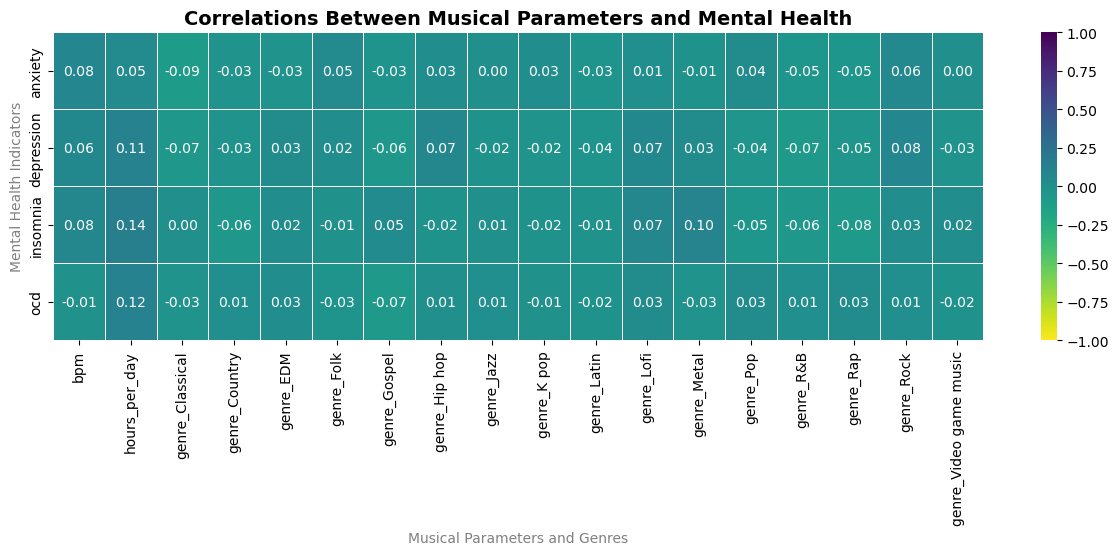

In [46]:
# Heatmap Visualization
plt.figure(figsize=(15, 4))
sns.heatmap(correlation_of_interest, annot=True, cmap="viridis_r", 
            vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.title("Correlations Between Musical Parameters and Mental Health", 
          fontsize=14, fontweight="bold")
plt.xlabel("Musical Parameters and Genres", color='gray')
plt.ylabel("Mental Health Indicators", color='gray')
plt.show()



- The most notable (though weak) **positive correlation** is between **listening hours** and **Insomnia** (**r ≈ 0.14**), **OCD** (**r ≈ 0.12**), and **Depression** (**r ≈ 0.11**).  
- **Metal** shows a slight positive correlation with **Insomnia** (**r ≈ 0.10**).  
- **Rock** has a weak correlation with **Depression** (**r ≈ 0.08**) and **Anxiety** (**r ≈ 0.06**).  
- For other genres and **BPM**, the correlation coefficients remain within **±0.1**, indicating no strong linear relationship.  

Overall, all observed correlations are **weak** (|r| < 0.2), suggesting that musical parameters do not have a significant influence on self-reported mental health conditions.тояний.

### Scatter Matrix for Numerical Features

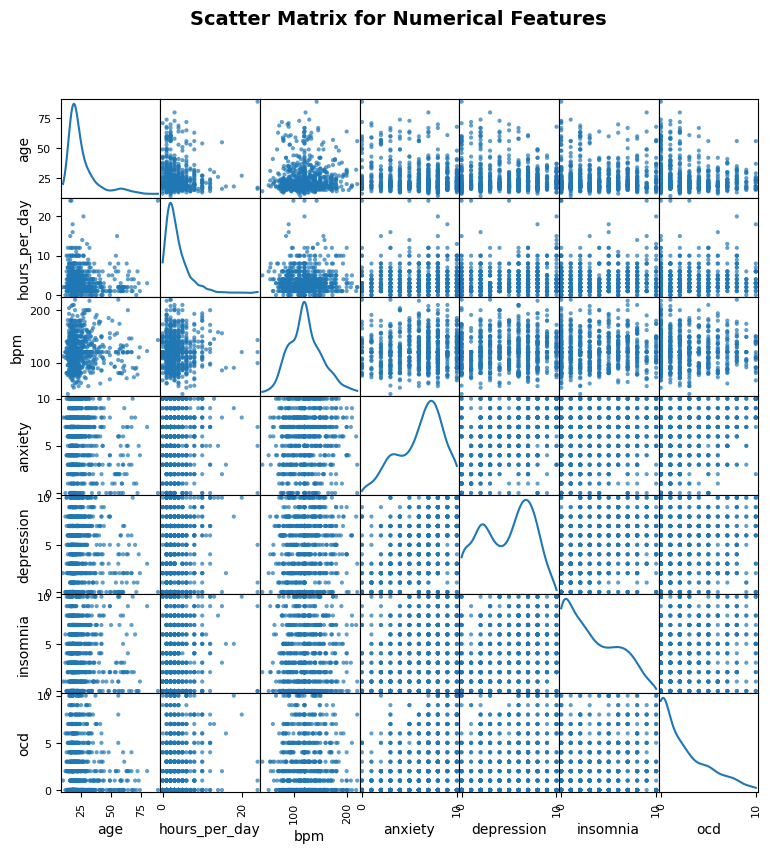

In [47]:
# Select numerical features of interest
numeric_vars = ['age', 'hours_per_day', 'bpm', 'anxiety', 'depression', 'insomnia', 'ocd']

# Create a scatter matrix for the selected features
pd.plotting.scatter_matrix(df[numeric_vars], figsize=(9, 9), diagonal='kde', alpha=0.7)

plt.suptitle("Scatter Matrix for Numerical Features", fontsize=14, fontweight="bold")
plt.show()



- **Age**: Weak negative correlation with **anxiety, depression, and OCD** (these indicators tend to be slightly lower with increasing age).  
- **Hours_per_day**: Slight positive correlation with **depression, insomnia, and OCD** (more listening hours are associated with slightly higher values of these indicators).  
- **BPM**: No clear linear relationship with any mental health indicators.  
- **Anxiety, Depression, Insomnia, OCD**: Weak positive relationships among them, but no strong linear dependency is observed.  

Next, we will analyze these relationships in more detail.

### By Favorite Genres

Let's examine whether mental health indicators differ among listeners of different genres.

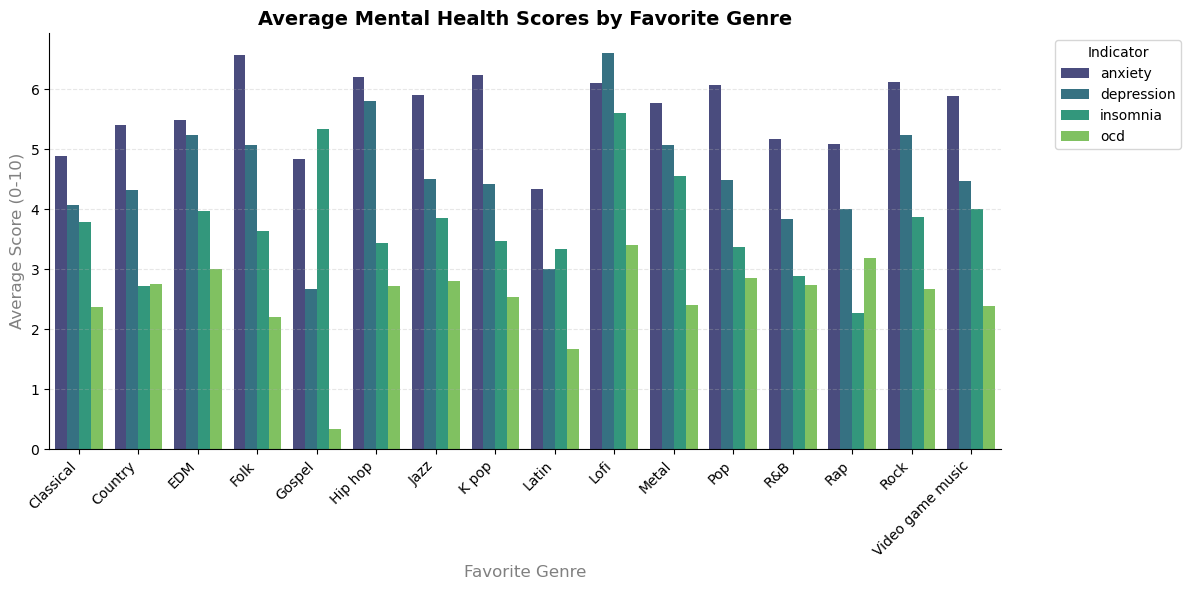

In [48]:
# Calculate the average mental health indicators for each genre
df_mean = df.groupby('fav_genre')[mental_cols].mean().reset_index()

# Transform data into long format for grouped bar plot
df_melt = df_mean.melt(id_vars='fav_genre', 
                       value_vars=mental_cols, 
                       var_name='Mental Condition', 
                       value_name='Score')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='fav_genre', y='Score', 
            hue='Mental Condition', palette="viridis")

# Chart formatting
plt.title("Average Mental Health Scores by Favorite Genre", 
          fontsize=14, fontweight='bold')
plt.xlabel("Favorite Genre", fontsize=12, color='gray')
plt.ylabel("Average Score (0-10)", fontsize=12, color='gray')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Indicator", bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()
plt.tight_layout()
plt.show()


- **Folk, Hip Hop, and Lofi** tend to have higher average levels of **anxiety, depression, and/or insomnia**.  
- **Classical, Country, R&B, and Rap** generally show **lower scores** across mental health indicators.  
- **Rap**: Notably lower levels of **insomnia** compared to other genres.  
- **Gospel and Latin**: Among the lowest scores, but the sample size is very small.  

Overall, fans of different genres exhibit **some variation** in mental health indicators, though these differences may not be too drastic and are influenced by individual factors. Additionally, the sample sizes for certain genres are quite small, including **K-pop (26 respondents), Country (25), Rap (22), Jazz (20), Lofi (16), Gospel (6), and Latin (3)**.

---

We will conduct **ANOVA (One-Way Analysis of Variance)** for each mental health indicator across favorite genre groups. If statistical significance is confirmed, we will use **Tukey HSD** to identify **specific genre pairs** with the most pronounced differences.  

- **Null Hypothesis (H₀):** The average mental health indicator (e.g., anxiety) is **the same** across all genres.  
- **Alternative Hypothesis (H₁):** At least one genre has a **significantly different** mean value.

In [49]:
# Set the significance level for all statistical tests
alpha = 0.05  

for mental in mental_cols:
    print(f"=== ANOVA for {mental} ===")
    # 1. Fit the model using OLS
    model = ols(f"{mental} ~ C(fav_genre)", data=df).fit()
    # 2. ANOVA table
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table, "\n")
    
    # Extract p-value from the first row of the table using .iloc[0]
    p_value = anova_table["PR(>F)"].iloc[0]
    
    if p_value < alpha:
        print("There are statistically significant differences between groups. Performing post-hoc test (Tukey HSD):\n")
        # 3. Post-hoc test (Tukey HSD)
        tukey = pairwise_tukeyhsd(endog=df[mental],
                                  groups=df["fav_genre"],
                                  alpha=alpha)
        print(tukey.summary(), "\n")
    else:
        print("No statistically significant differences between groups.\n")
    print("="*80)


=== ANOVA for anxiety ===
                   sum_sq     df        F    PR(>F)
C(fav_genre)   145.253902   15.0  1.24789  0.230259
Residual      5587.180881  720.0      NaN       NaN 

No statistically significant differences between groups.

=== ANOVA for depression ===
                   sum_sq     df         F    PR(>F)
C(fav_genre)   257.818652   15.0  1.907354  0.019716
Residual      6488.201728  720.0       NaN       NaN 

There are statistically significant differences between groups. Performing post-hoc test (Tukey HSD):

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1       group2      meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------
Classical          Country   0.2445    1.0 -2.2597  2.7488  False
Classical              EDM   1.1678 0.9103 -1.0434   3.379  False
Classical             Folk   0.9912 0.9877  -1.367  3.3494  False
Classical           Gospel  -1.4088 0.9994 -5.8547   3.037  False
Cla

1. **Anxiety:**  
   - ANOVA showed no significant differences between favorite genre groups (p = 0.2303).  
>

2. **Depression:**  
   - Overall ANOVA revealed statistically significant differences between genres (p = 0.0197).  
   - However, the post-hoc test (Tukey HSD) did not identify any specific genre pairs with statistically significant differences.  
>

3. **Insomnia:**  
   - ANOVA indicated statistically significant differences (p = 0.0483).  
   - The post-hoc analysis did not detect meaningful pairwise differences, suggesting either weak differences or high variability within groups.  
>

4. **OCD:**  
   - No significant differences between genres (p = 0.8554).  
>

**Overall Summary:**  
Among the mental health indicators, only **depression** and **insomnia** show overall differences between groups based on favorite genre. However, when comparing specific genre pairs, no statistically significant differences were found. This could be due to **high data variability** or **small sample sizes** in some groups.

### By Favorite Genre BPM 

Since the **BPM distribution is non-normal and contains outliers**, we will use **Spearman's correlation** to assess relationships, as it is less sensitive to outliers and does not require normality.  

- **Null Hypothesis (H₀):** There is no monotonic relationship between BPM and the other variable (ρ = 0).  
- **Alternative Hypothesis (H₁):** There is a monotonic relationship between BPM and the other variable (ρ ≠ 0).

In [50]:
# Correlation analysis of BPM with other numerical variables
numeric_vars = ['age', 'hours_per_day', 'anxiety', 'depression', 'insomnia', 'ocd']

print("Results of BPM Correlation Analysis with Other Variables:")
print("=" * 60)

for var in numeric_vars:
    # Remove missing values for each variable
    valid_data = df[['bpm', var]].dropna()
    r, p_value = st.spearmanr(valid_data['bpm'], valid_data[var])
    
    # Significance check
    if p_value < alpha:
        significance_result = "Reject the null hypothesis."
        correlation_result = (
            f"    As BPM increases, the level of {var.lower()} {'increases' if r > 0 else 'decreases'}."
        )
    else:
        significance_result = "Failed to reject the null hypothesis."
        correlation_result = ""
    
    # Display results in the desired format
    print(f"  {var.capitalize()}: Spearman ρ = {r:.3f}, p-value = {p_value:.3f}")
    print(f"    {significance_result}")
    if correlation_result:
        print(correlation_result)
    print("-" * 60)


Results of BPM Correlation Analysis with Other Variables:
  Age: Spearman ρ = 0.026, p-value = 0.475
    Failed to reject the null hypothesis.
------------------------------------------------------------
  Hours_per_day: Spearman ρ = 0.021, p-value = 0.569
    Failed to reject the null hypothesis.
------------------------------------------------------------
  Anxiety: Spearman ρ = 0.076, p-value = 0.039
    Reject the null hypothesis.
    As BPM increases, the level of anxiety increases.
------------------------------------------------------------
  Depression: Spearman ρ = 0.075, p-value = 0.043
    Reject the null hypothesis.
    As BPM increases, the level of depression increases.
------------------------------------------------------------
  Insomnia: Spearman ρ = 0.096, p-value = 0.009
    Reject the null hypothesis.
    As BPM increases, the level of insomnia increases.
------------------------------------------------------------
  Ocd: Spearman ρ = -0.004, p-value = 0.920
    Fa

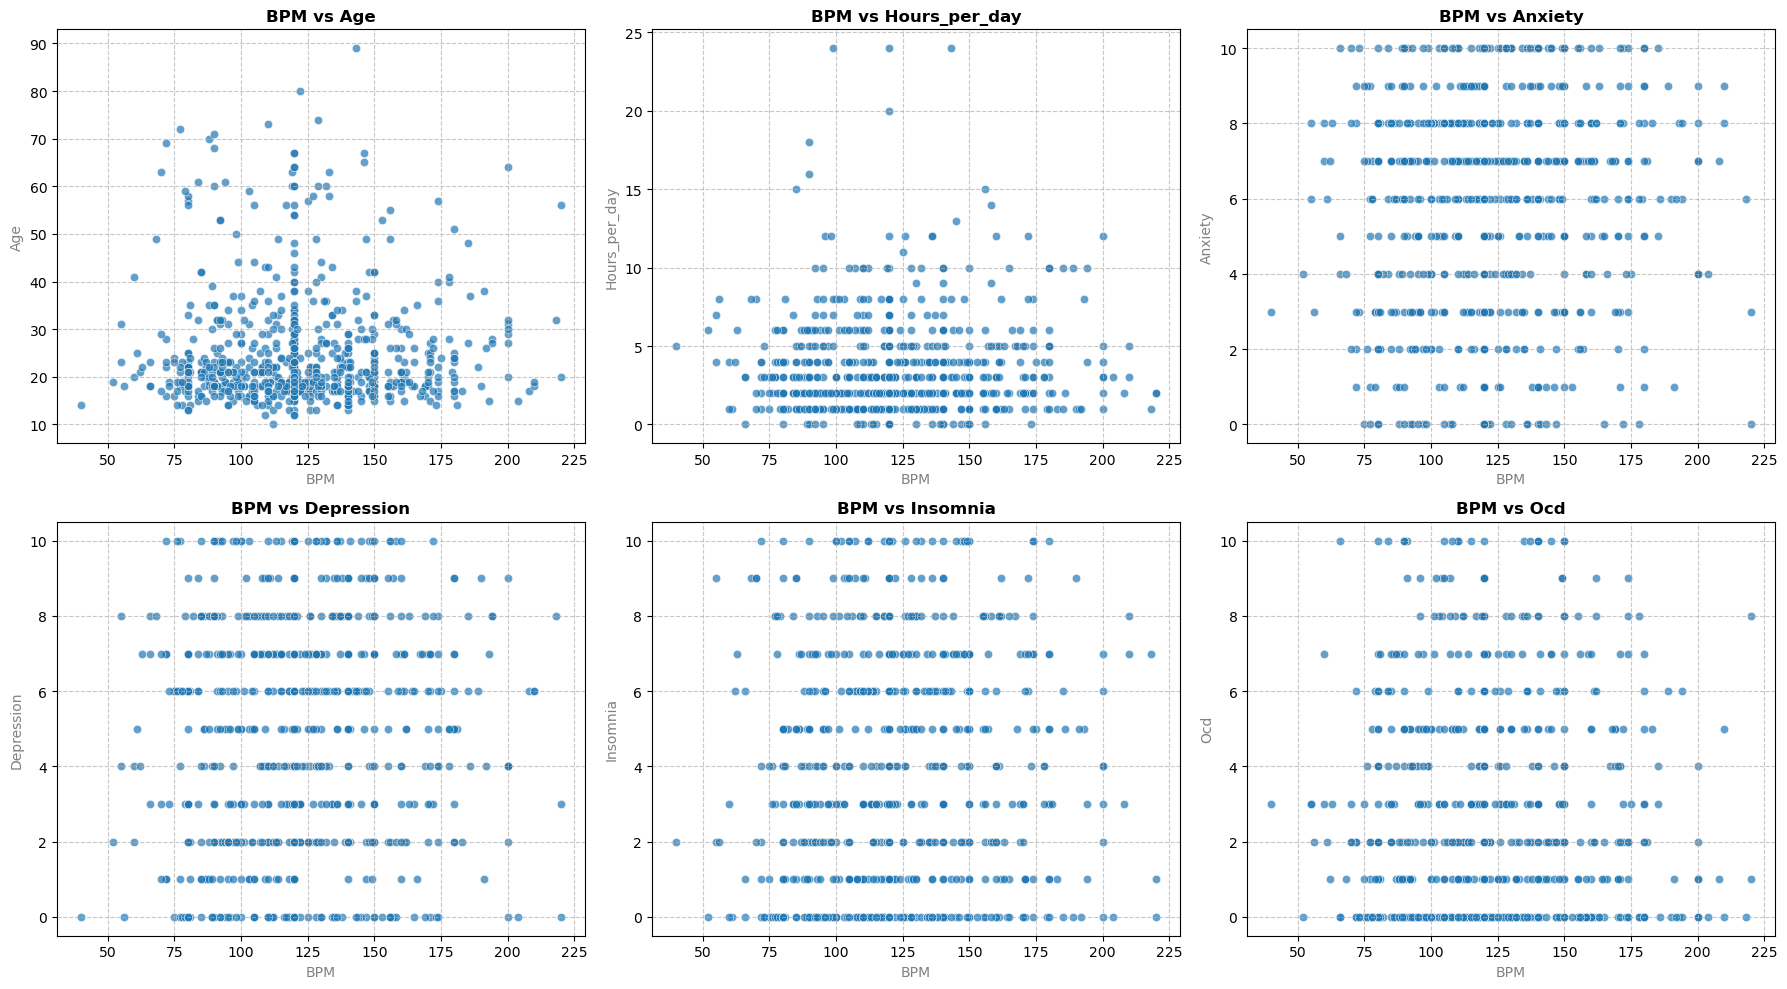

In [51]:
# Visualisation (scatter plots)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, var in enumerate(numeric_vars):
    sns.scatterplot(data=df, x='bpm', y=var, ax=axes[i], alpha=0.7)
    axes[i].set_title(f"BPM vs {var.capitalize()}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("BPM", fontsize=10, color='gray')
    axes[i].set_ylabel(var.capitalize(), fontsize=10, color='gray')
    axes[i].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- BPM shows **almost no correlation** with **age** and **listening hours**.  
- The most significant result was found for **Insomnia** (p = 0.009), but the correlation is weak.  
- **Anxiety** and **Depression** also showed a weak positive correlation, but the values are low.  
- **OCD** has no relationship with BPM at all.  

Although some variables show statistical significance (p < 0.05), all correlation coefficients are **low**, indicating a **very weak relationship**..

### By Genre Listening Frequency

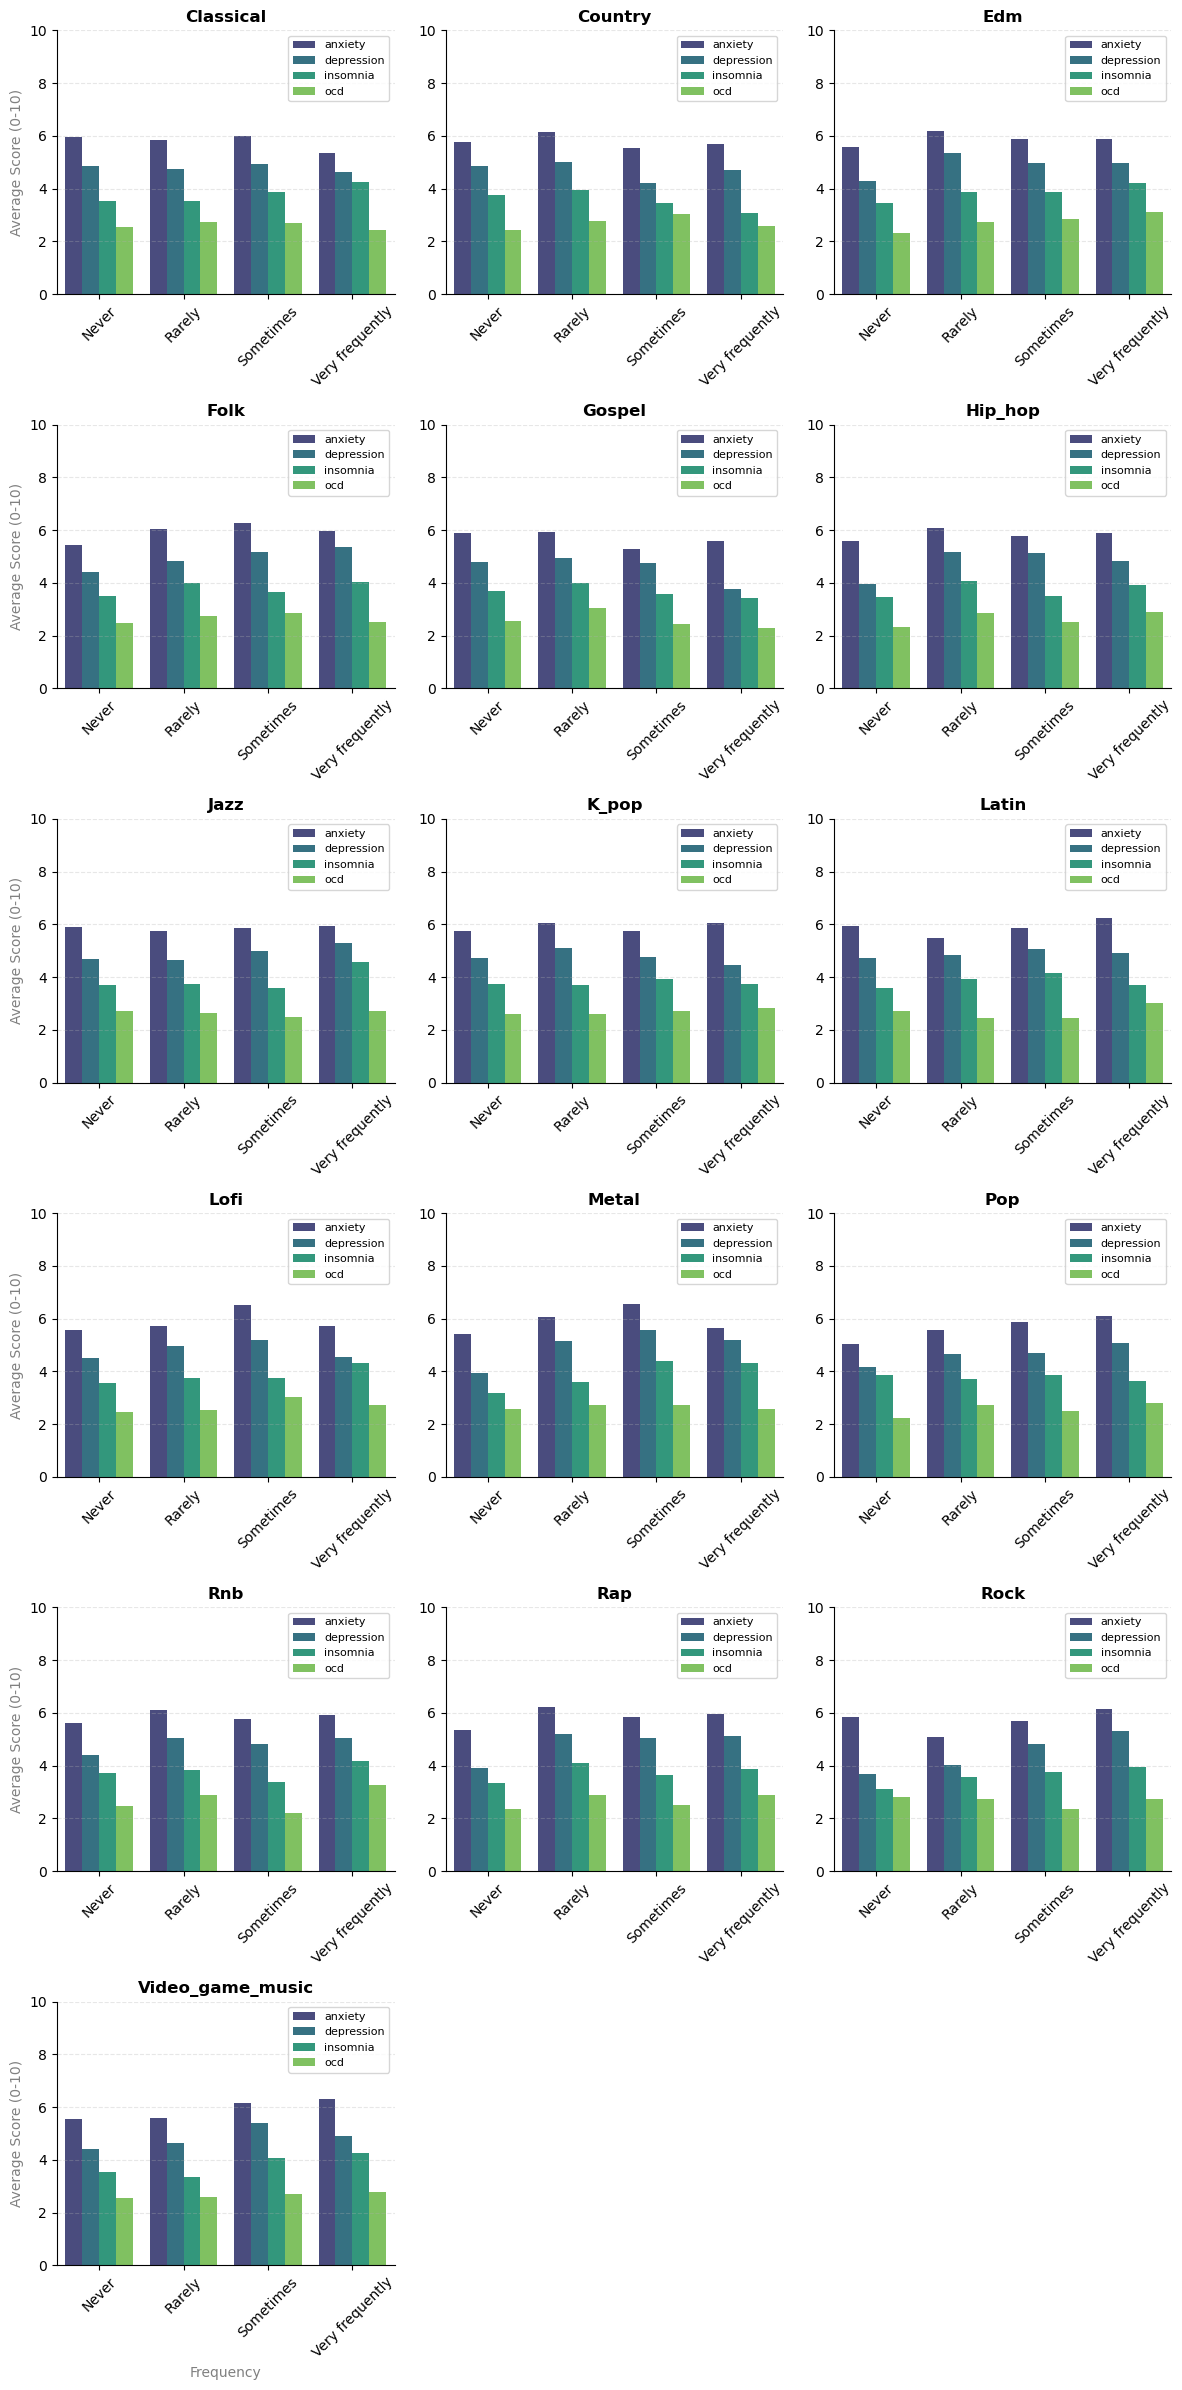

In [52]:
# List of columns representing listening frequency for each genre
frequency_columns = [
    "frequency_classical", "frequency_country", "frequency_edm", "frequency_folk", 
    "frequency_gospel", "frequency_hip_hop", "frequency_jazz", "frequency_k_pop", 
    "frequency_latin", "frequency_lofi", "frequency_metal", "frequency_pop", 
    "frequency_rnb", "frequency_rap", "frequency_rock", "frequency_video_game_music"
]

# Define category order if known
freq_order = ["Never", "Rarely", "Sometimes", "Very frequently"]

# Determine the number of plots per row and total rows
ncols = 3  
nrows = int(np.ceil(len(frequency_columns) / ncols))

# Create figure and axes array
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 4))
axes = axes.flatten()

# Iterate over the frequency columns
for i, freq_col in enumerate(frequency_columns):
    ax = axes[i]
    
    # Group data by category in the column and compute average mental health scores
    grouped = df.groupby(freq_col)[mental_cols].mean()
    
    # Reorder categories if the order is known
    grouped = grouped.reindex(freq_order)
    
    # Reset index and convert to long format for easy plotting
    grouped = grouped.reset_index().melt(id_vars=freq_col, 
                                          var_name="Mental Health", 
                                          value_name="Average Score")
    
    # Create a bar plot with grouped mental health indicators
    sns.barplot(data=grouped, x=freq_col, y="Average Score", hue="Mental Health", 
                palette="viridis", ax=ax)
    
    # Set chart title
    ax.set_title(freq_col.replace("frequency_", "").capitalize(), 
                 fontsize=12, fontweight='bold')
    
    # Set Y-axis label only for the leftmost plots in each row
    if i % ncols == 0:
        ax.set_ylabel("Average Score (0-10)", fontsize=10, color='gray')
    else:
        ax.set_ylabel("")
    
    # Set X-axis label only for the bottom row plots
    if i >= (nrows - 1) * ncols:
        ax.set_xlabel("Frequency", fontsize=10, color='gray')
    else:
        ax.set_xlabel("")
    
    ax.set_ylim(0, 10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.legend(loc='upper right', fontsize=8)

# Hide any extra axes if they exist
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

sns.despine()
plt.tight_layout()
plt.show()


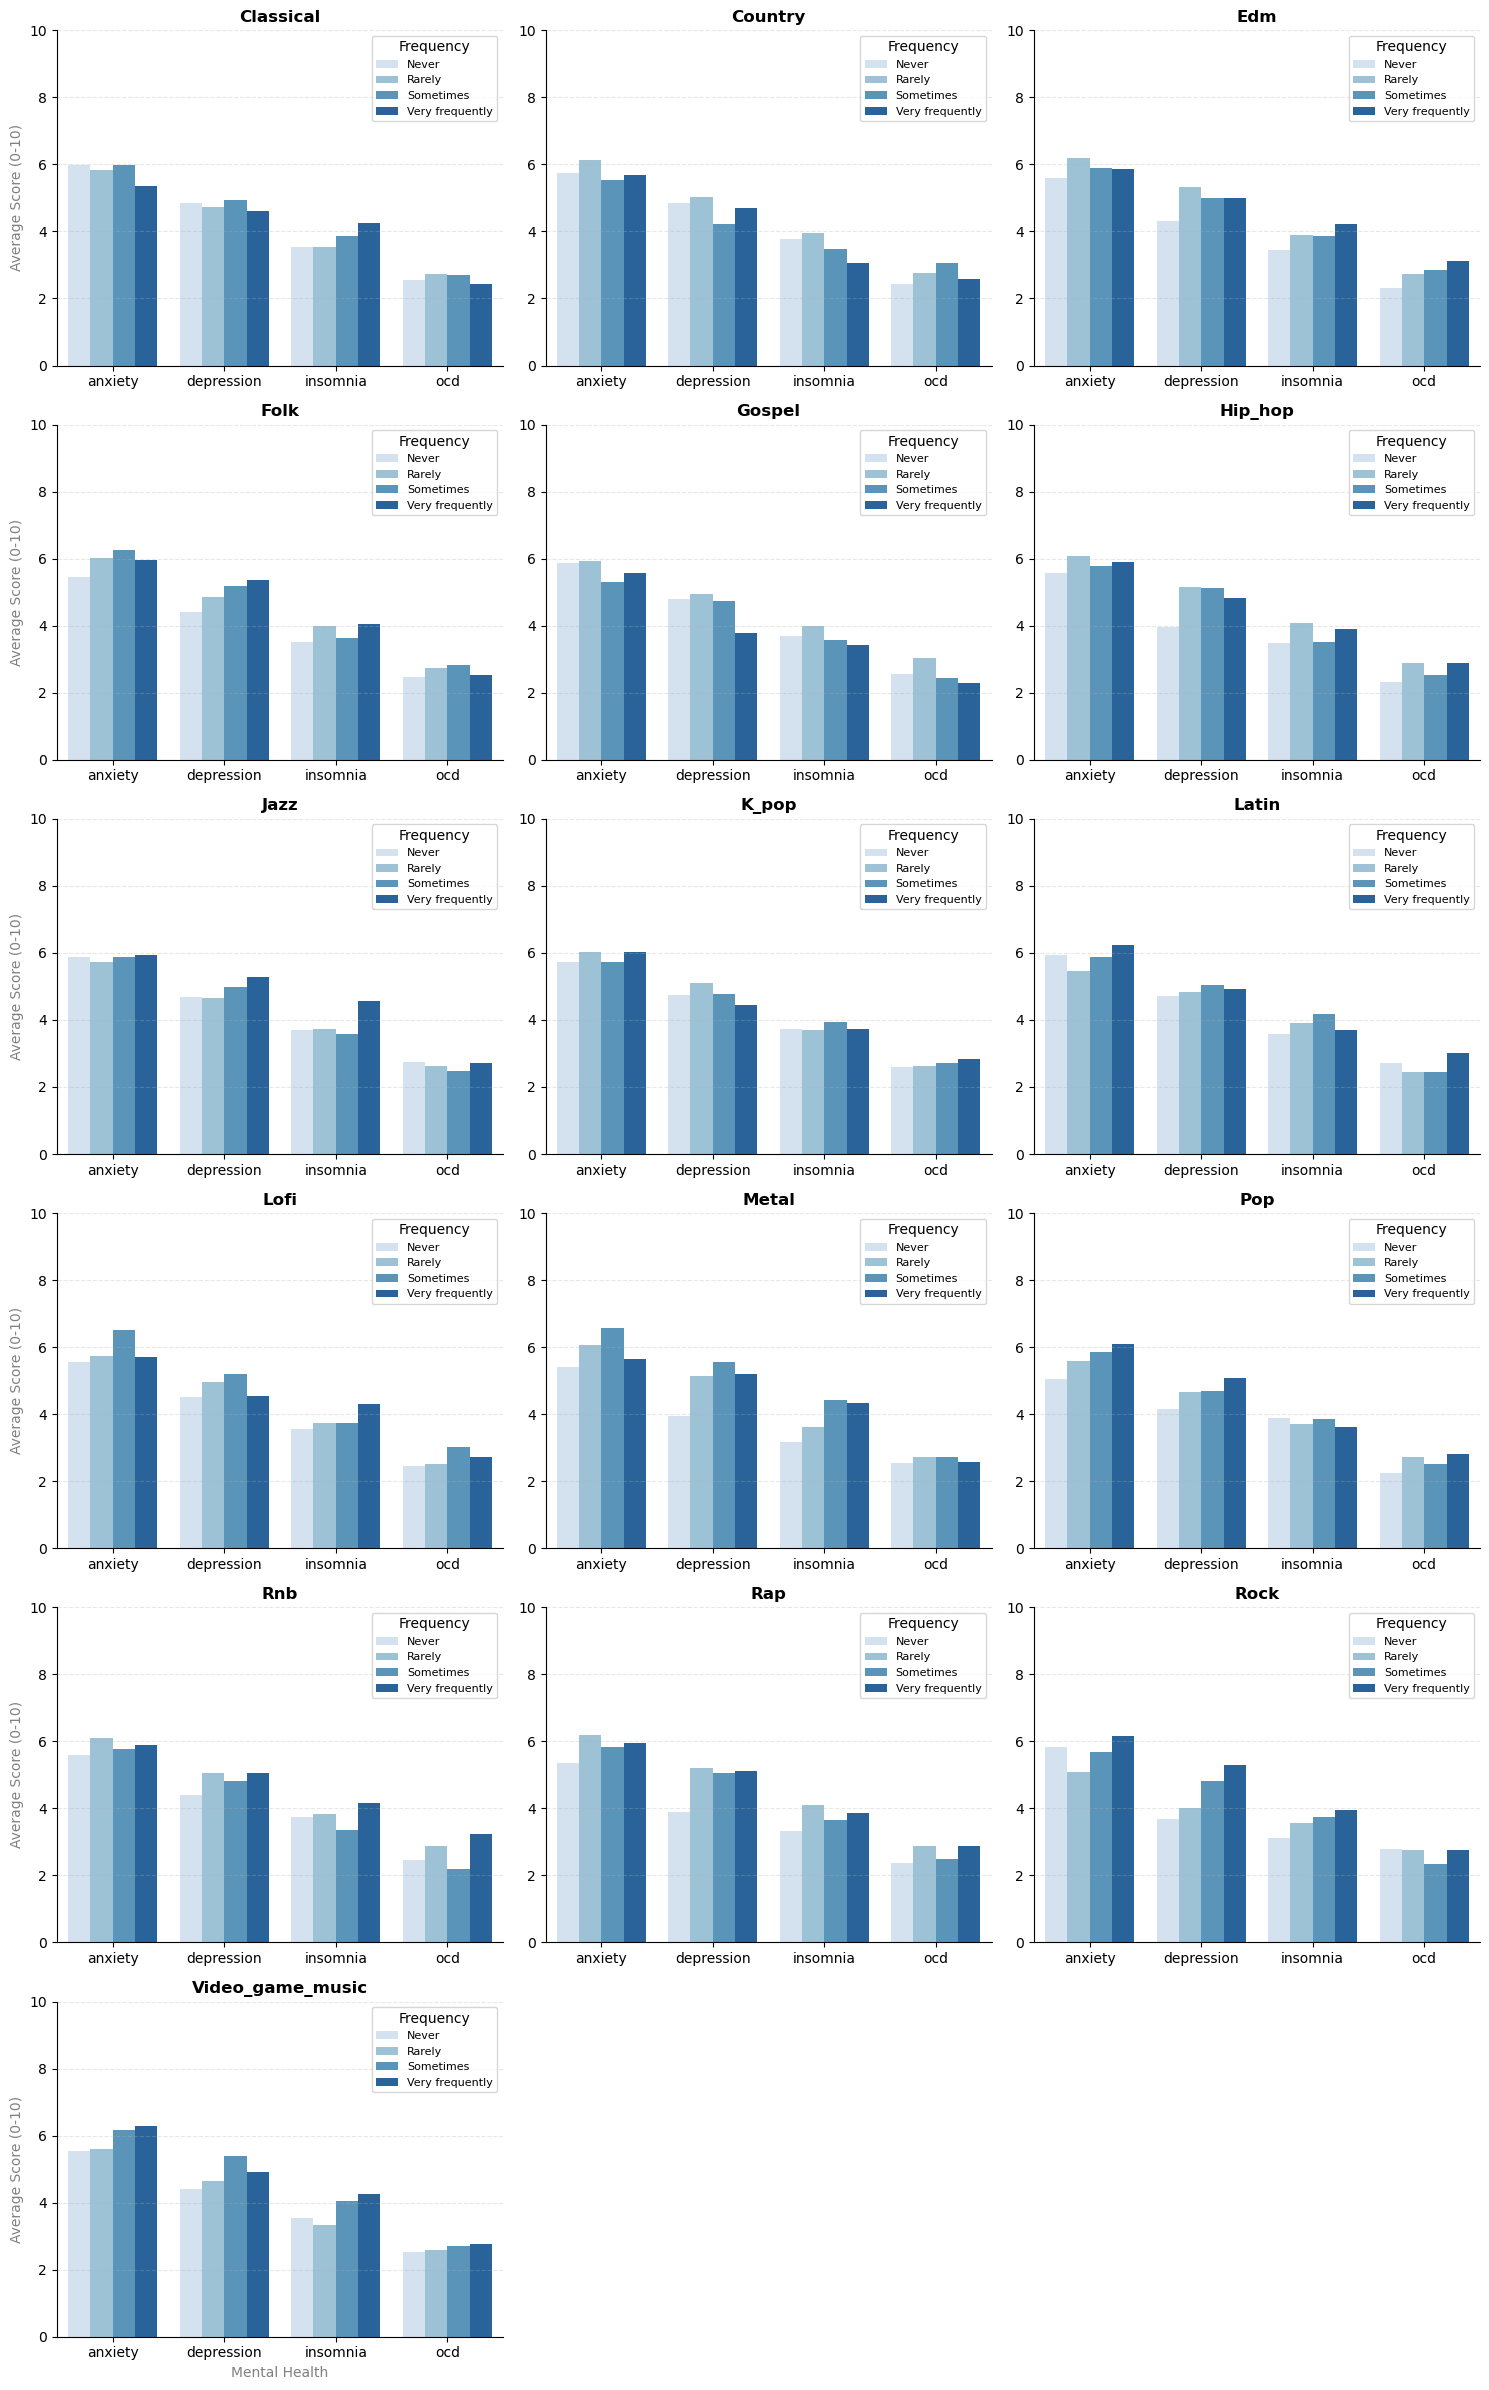

In [53]:
# Determine the number of plots per row and total rows
ncols = 3  
nrows = int(np.ceil(len(frequency_columns) / ncols))

plt.figure(figsize=(ncols * 5, nrows * 4))

for i, freq_col in enumerate(frequency_columns):
    plt.subplot(nrows, ncols, i+1)
    
    # Group data by category in the given column and calculate the mean values for mental health indicators
    grouped = df.groupby(freq_col)[mental_cols].mean()
    # Reorder rows according to the predefined order
    grouped = grouped.reindex(freq_order)
    
    # Convert aggregated data into long format
    grouped = grouped.reset_index().melt(id_vars=freq_col, 
                                          var_name="Mental Health", 
                                          value_name="Average Score")
    
    # Create a bar plot: X-axis – mental health indicators, legend – frequency category
    sns.barplot(data=grouped, x="Mental Health", y="Average Score", 
                hue=freq_col, palette="Blues")
    
    plt.title(freq_col.replace("frequency_", "").capitalize(), 
              fontsize=12, fontweight='bold')
    
    # Display Y-axis label only for the leftmost plot in each row
    if i % ncols == 0:
        plt.ylabel("Average Score (0-10)", fontsize=10, color='gray')
    else:
        plt.ylabel("")
    
    # Display X-axis label only for the bottom row plots
    if i >= (nrows - 1) * ncols:
        plt.xlabel("Mental Health", fontsize=10, color='gray')
    else:
        plt.xlabel("")
    
    plt.ylim(0, 10)
    plt.xticks(rotation=0)
    plt.legend(title="Frequency", fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine()
plt.tight_layout()
plt.show()



- **No universal pattern**: In some genres (e.g., **Video game music**), the **"Sometimes"** group shows higher scores, while in others, increased values may appear in **"Rarely"** or **"Very frequently"** categories.  

- **Moderate increase**: For some genres (**Classical, Pop, Metal**), there is a **slight increase** in anxiety, depression, or insomnia levels when moving from **"Never"** to **"Very frequently"**, but this trend is **not consistent** across all genres.  

- **Low or unstable data**: Some genres (**Gospel, Latin, K-pop**) have a **small sample size**, making conclusions less reliable; fluctuations between categories may be random.  

- **Overall variability**: Differences between listening frequency categories (**"Never," "Rarely," "Sometimes," "Very frequently"**) are usually **minor** and genre-dependent. There is no clear **linear** increase or decrease in mental health indicators with more frequent listening to a specific genre.

### By Number of Listening Hours

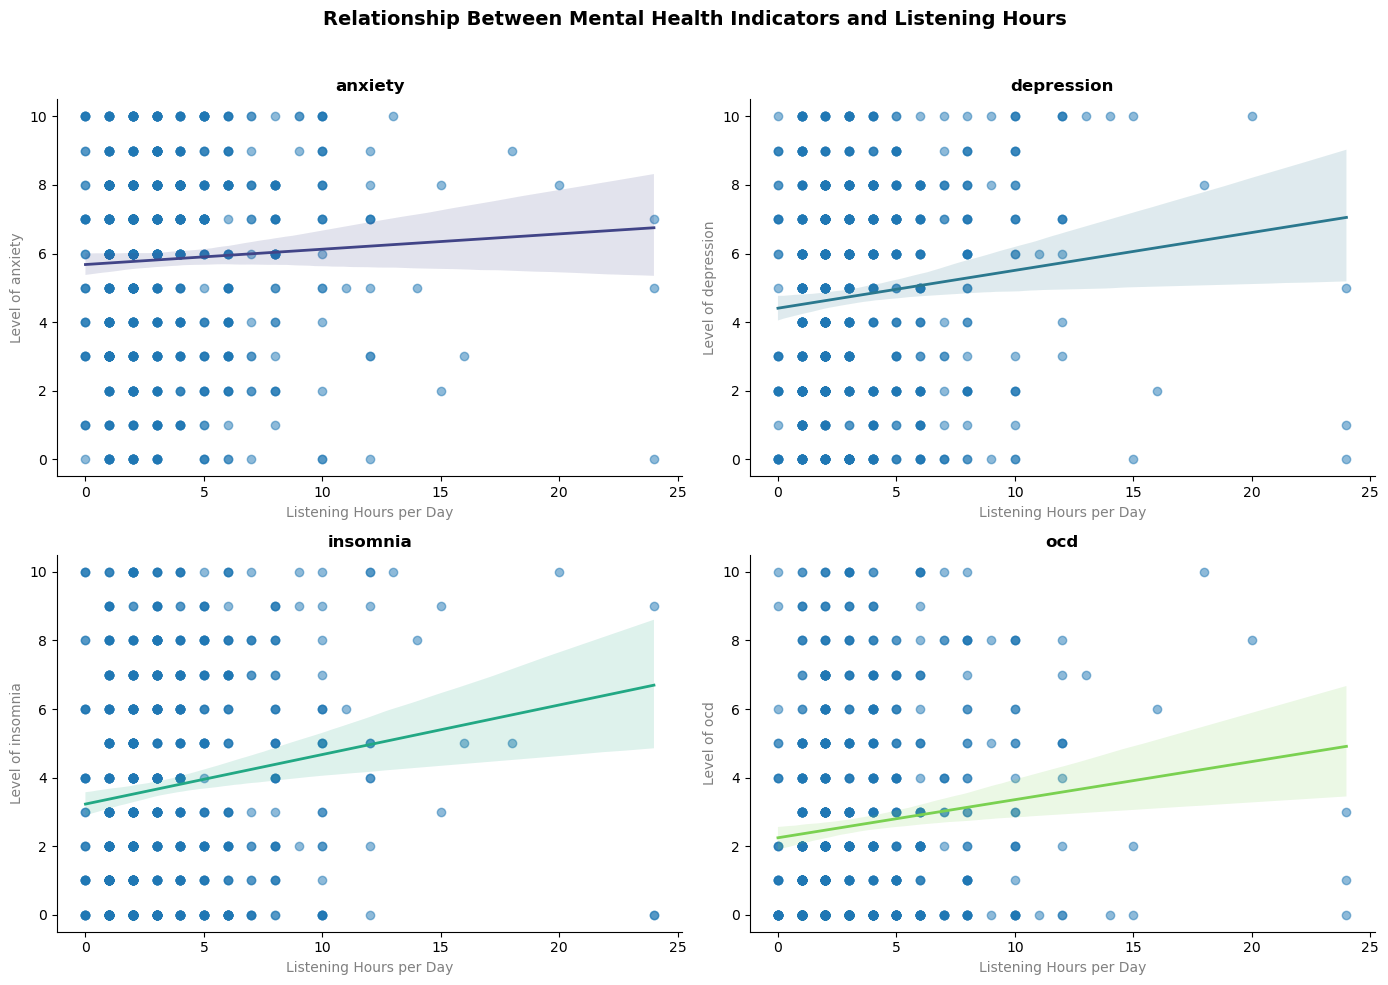

In [54]:
# Define figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

palette = sns.color_palette("viridis", len(mental_cols))

# Define color for listening hours
listening_color = "#1f77b4"  # Blue

# Create regression plots
for ax, col, color in zip(axes.flatten(), mental_cols, palette):
    sns.regplot(
        data=df, x="hours_per_day", y=col, ax=ax,
        scatter_kws={'color': listening_color, 'alpha': 0.5},  # Blue points
        line_kws={'color': color, 'linewidth': 2}  # Line color from viridis
    )
    ax.set_title(col, fontsize=12, fontweight="bold")
    ax.set_xlabel("Listening Hours per Day", color='gray')
    ax.set_ylabel(f"Level of {col.lower()}", color='gray')

# Adjust layout
plt.suptitle("Relationship Between Mental Health Indicators and Listening Hours", 
             fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
sns.despine()
plt.show()



- **Overall trend**: All four regression plots show a **positive slope**, indicating that **more hours** of daily music listening are associated with **higher levels** of anxiety (**Anxiety**), depression (**Depression**), insomnia (**Insomnia**), and OCD (**OCD**).  

- **The strongest relationship** is observed for **Insomnia**: the more respondents listen to music, the more pronounced their insomnia symptoms appear.  

- **Similarly**, as listening hours increase, **Depression**, **Anxiety**, and **OCD** levels also tend to rise, although the relationship is weaker compared to insomnia. The weakest increase is seen in **Anxiety**.  

Thus, the results suggest a **slight but positive correlation** between the number of hours spent listening to music and self-reported mental health issues.

---

We will conduct **correlation tests** by calculating Pearson’s correlation with *hours_per_day*. Based on the correlation value, we will compute the t-statistic and present the results along with hypothesis statements:

- **Null Hypothesis (H₀):**  
There is no linear relationship between daily music listening hours and mental health indicators (r = 0).  

- **Alternative Hypothesis (H₁):**  
A linear relationship exists (r ≠ 0).

In [55]:
print("Results for the variable hours_per_day:")
for mental in mental_cols:
    # Sample size
    n = df.shape[0]
    
    # Compute Pearson correlation coefficient and p-value
    r, p_value = st.pearsonr(df['hours_per_day'], df[mental])
    
    # Calculate t-statistic: t = r * sqrt((n-2)/(1-r^2))
    t_stat = r * math.sqrt((n - 2) / (1 - r**2)) if abs(r) < 1 else float('inf')
    
    print(f"  {mental.capitalize()}: t = {t_stat:.3f}, p-value = {p_value:.3f}")
    if p_value < alpha:
        print("    Reject the null hypothesis.")
        if t_stat > 0:
            print(f"    As Hours_per_day increases, the level of {mental} increases.")
        elif t_stat < 0:
            print(f"    As Hours_per_day increases, the level of {mental} decreases.")
    else:
        print("    Failed to reject the null hypothesis.")
    print("-" * 50)


Results for the variable hours_per_day:
  Anxiety: t = 1.327, p-value = 0.185
    Failed to reject the null hypothesis.
--------------------------------------------------
  Depression: t = 3.036, p-value = 0.002
    Reject the null hypothesis.
    As Hours_per_day increases, the level of depression increases.
--------------------------------------------------
  Insomnia: t = 3.916, p-value = 0.000
    Reject the null hypothesis.
    As Hours_per_day increases, the level of insomnia increases.
--------------------------------------------------
  Ocd: t = 3.264, p-value = 0.001
    Reject the null hypothesis.
    As Hours_per_day increases, the level of ocd increases.
--------------------------------------------------


- **Anxiety:** No statistically significant relationship with listening hours (**p = 0.185**).  
- **Depression:** Increased listening hours are significantly associated with higher depression levels (**t = 3.036, p = 0.002**).  
- **Insomnia:** A notable increase in insomnia levels is observed with more listening hours (**t = 3.916, p = 0.000**).  
- **OCD:** Higher listening hours are significantly linked to increased OCD levels (**t = 3.264, p = 0.001**).  

Thus, **longer music listening time is associated with higher depression, insomnia, and OCD levels**, while no significant effect on **anxiety** was found.

### By Music-Listening Habits

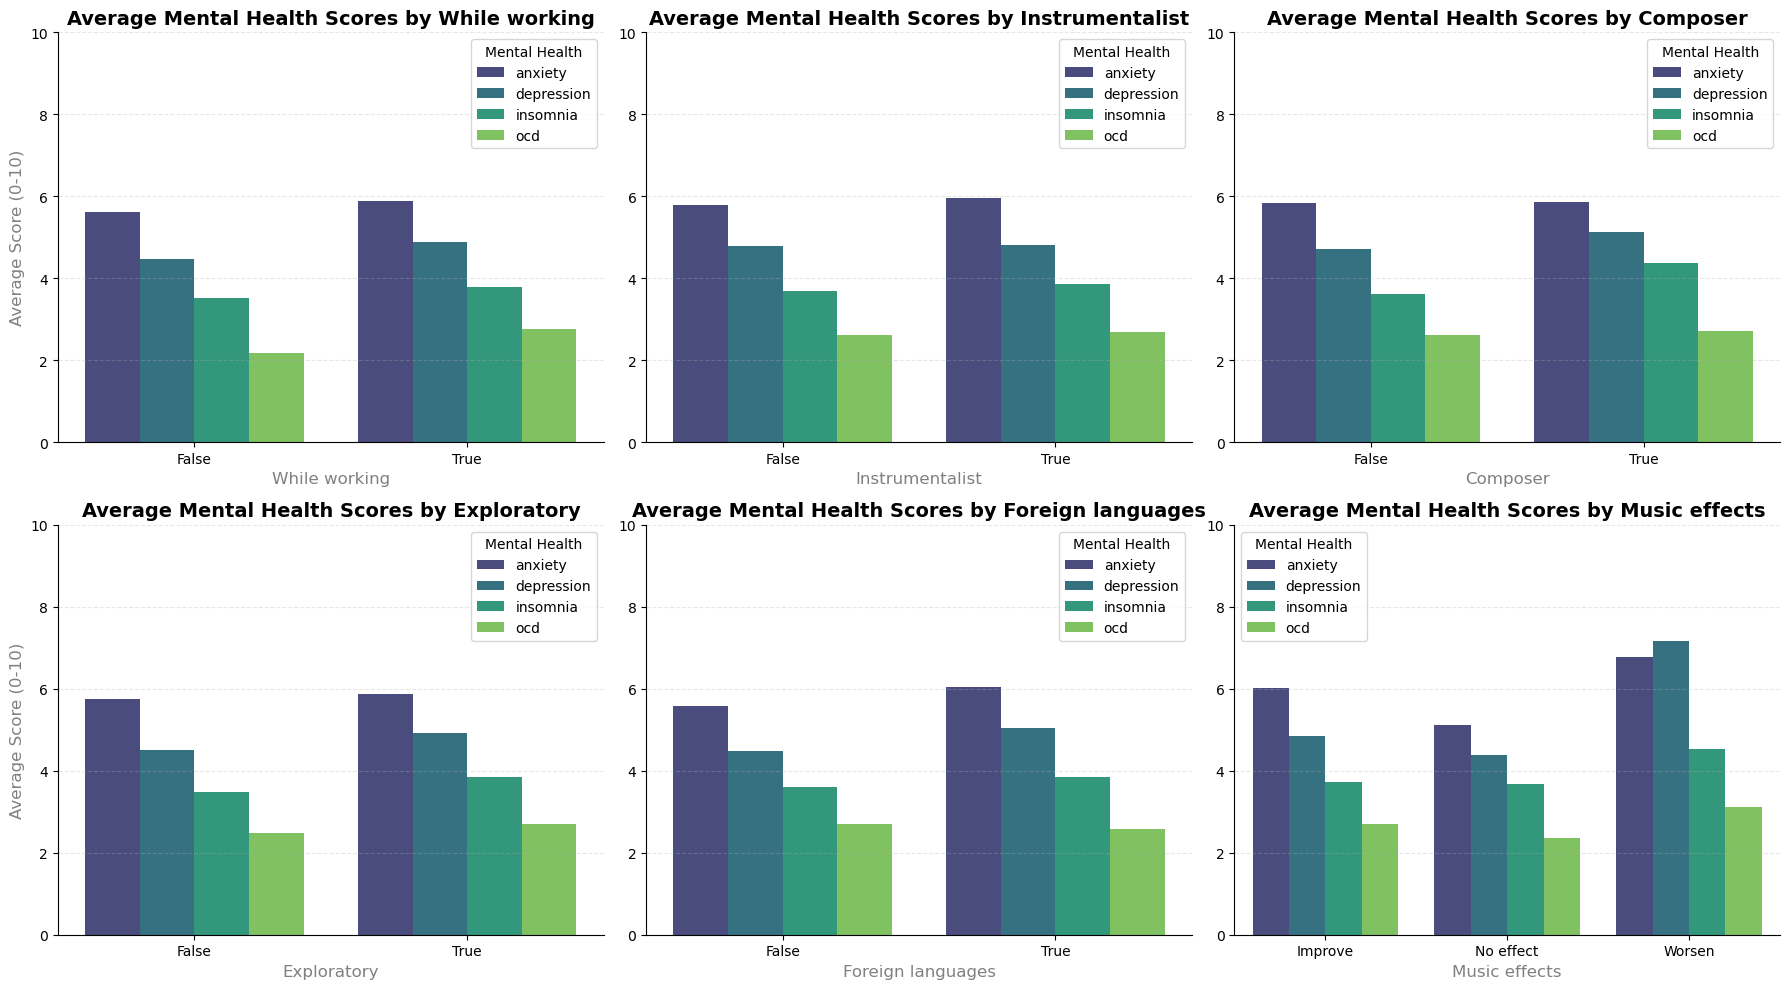

In [56]:
# Determine the number of plots and layout (3 plots per row)
ncols = 3  # Number of columns in a row
nrows = int(np.ceil(len(binary_columns) / ncols))  # Calculate required rows

# Create figure and axes
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 5))
axes = axes.flatten()

# Generate plots for each binary variable
for i, var in enumerate(binary_columns):
    # Group data by binary variable and calculate the mean of mental health indicators
    group_means = df.groupby(var)[mental_cols].mean().reset_index()
    # Convert to long format for easier plotting
    group_means_melt = group_means.melt(id_vars=var, var_name="Mental Health", 
                                        value_name="Average Score")
    
    # Create bar plot on the corresponding axis
    sns.barplot(data=group_means_melt, x=var, y="Average Score", 
                hue="Mental Health", palette="viridis", ax=axes[i])
    axes[i].set_title(f"Average Mental Health Scores by {var.replace('_', ' ').capitalize()}", 
                      fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var.replace('_', ' ').capitalize(), fontsize=12, color='gray')
    
    # Show y-axis label only for the first column in each row
    if i % ncols == 0:
        axes[i].set_ylabel("Average Score (0-10)", fontsize=12, color='gray')
    else:
        axes[i].set_ylabel("")
    
    axes[i].set_ylim(0, 10)
    axes[i].legend(title="Mental Health", fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

# Remove extra axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()




1. **While_working (Listening to Music While Studying/Working)**  
   - The chart shows that respondents who **listen to music** while working (True) have a slightly **higher** average OCD score compared to those who do not listen.  
>



2. **Instrumentalist (Playing a Musical Instrument)**  
   - **No significant differences** in average anxiety, depression, insomnia, or OCD levels are observed between those who play an instrument (True) and those who do not (False).  
>



3. **Composer (Composing Music)**  
   - Composers (True) exhibit a **higher** average insomnia score, while anxiety, depression, and OCD remain relatively unchanged compared to non-composers.  
>



4. **Exploratory (Actively Exploring New Genres/Artists)**  
   - Average mental health scores appear **similar** between True/False groups, with no clear visual differences.  
>



5. **Foreign_languages (Listening to Music in Foreign Languages)**  
   - Respondents who regularly listen to music in foreign languages (True) have **higher** average anxiety and depression scores compared to those who do not.  
>



6. **Music_effects (Impact of Music on Mental State)**  
   - Those who report that music **"worsens"** their mental state have the **highest** average anxiety, depression, insomnia, and OCD scores.  
   - Those who say music **"improves"** their condition show the **lowest** mental health scores.  
   - The **"no effect"** group usually falls **between** these two extremes.  
>



**Overall Conclusions:**  
- Certain variables (**while_working, composer, foreign_languages, music_effects**) are associated with **higher** average mental health scores for some conditions.  
- Other variables (**instrumentalist, exploratory**) do not show **noticeable** differences in the chart.  
- The **most striking** difference is among respondents who believe that music worsens their condition: they have **higher** scores in all four mental health indicators (**anxiety, depression, insomnia, OCD**), while those who say music improves their condition tend to have **lower** scores across the board.

---

Given that the distributions of mental health indicators are quite skewed, we will conduct the **Mann–Whitney U test**. This test compares two independent groups (e.g., respondents who listen to music while studying/working versus those who do not). The hypotheses for each test can be formulated as follows:

- **Null Hypothesis (H₀):**  
  The average value of the mental health indicator (e.g., **anxiety, depression, insomnia, or OCD**) is **the same** for both groups. In other words, there is no significant difference between the groups.

- **Alternative Hypothesis (H₁):**  
  The average value of the mental health indicator **differs** between the groups. This suggests that there is a statistically significant difference in the mean value of the indicator between the groups.

If the null hypothesis is rejected, we then determine the **direction** of the differences (i.e., whether one group has higher or lower values compared to the other).

In [57]:
for var in binary_columns:
    print(f"Results of the Mann–Whitney U test for variable: {var}")
    for measure in mental_cols:
        # Selecting data for True and False groups based on the current independent variable
        group_true = df[df[var] == True][measure].dropna()
        group_false = df[df[var] == False][measure].dropna()
        
        # Check: If either group is empty, print a message and move to the next indicator
        if group_true.empty or group_false.empty:
            print(f"  {measure.capitalize()}: insufficient data to perform the test.")
            continue
        
        # Conducting the test (two-sided alternative)
        u_stat, p_value = st.mannwhitneyu(group_true, group_false, alternative='two-sided')
        
        # Calculating mean values for additional output
        mean_true = group_true.mean()
        mean_false = group_false.mean()
        
        # Formatting and displaying the results
        print(f"  {measure.capitalize()}: U = {u_stat:.3f}, p-value = {p_value:.3f}")
        if p_value < alpha:
            print("    Rejecting the null hypothesis.")
            if mean_true > mean_false:
                print(f"    The mean value for {var}=True is **higher** than for {var}=False.")
            elif mean_true < mean_false:
                print(f"    The mean value for {var}=True is **lower** than for {var}=False.")
            else:
                print(f"    The mean values for {var}=True and {var}=False are equal.")
        else:
            print("    Failed to reject the null hypothesis.")
    print("========================================")


Results of the Mann–Whitney U test for variable: while_working
  Anxiety: U = 46790.000, p-value = 0.397
    Failed to reject the null hypothesis.
  Depression: U = 48481.500, p-value = 0.116
    Failed to reject the null hypothesis.
  Insomnia: U = 46561.000, p-value = 0.453
    Failed to reject the null hypothesis.
  Ocd: U = 51020.000, p-value = 0.007
    Rejecting the null hypothesis.
    The mean value for while_working=True is **higher** than for while_working=False.
Results of the Mann–Whitney U test for variable: instrumentalist
  Anxiety: U = 61023.500, p-value = 0.420
    Failed to reject the null hypothesis.
  Depression: U = 59562.500, p-value = 0.795
    Failed to reject the null hypothesis.
  Insomnia: U = 60602.500, p-value = 0.516
    Failed to reject the null hypothesis.
  Ocd: U = 60970.500, p-value = 0.424
    Failed to reject the null hypothesis.
Results of the Mann–Whitney U test for variable: composer
  Anxiety: U = 38940.000, p-value = 0.813
    Failed to reject 


**While_working (Listening to music while working/studying):**  
- No significant differences were found for **anxiety** (p = 0.397), **depression** (p = 0.116), and **insomnia** (p = 0.453).  
- A significant difference was found for **OCD** (U = 51020.000, p = 0.007): respondents who listen to music while working/studying have a **higher** level of OCD compared to those who do not.

**Instrumentalist (Plays a musical instrument):**  
- No significant differences were found for any of the mental health indicators (**anxiety, depression, insomnia, OCD**) (p > 0.42 in all cases).

**Composer (Composes music):**  
- No differences were found for **anxiety** (p = 0.813) and **depression** (p = 0.160).  
- A significant difference was found for **insomnia** (U = 43974.000, p = 0.010): composers have a **higher** level of insomnia.  
- **OCD** showed no difference (p = 0.596).

**Exploratory (Actively explores new genres/artists):**  
- None of the indicators (**anxiety, depression, insomnia, OCD**) showed significant differences between groups (p > 0.089).

**Foreign_languages (Listens to music in foreign languages):**  
- Significant differences were found for **anxiety** (U = 73371.500, p = 0.023) and **depression** (U = 74053.500, p = 0.012): respondents who listen to music in foreign languages have **higher** levels of anxiety and depression.  
- **Insomnia** (p = 0.375) and **OCD** (p = 0.859) showed no differences between groups.

**Music_effects:**  
- No results were obtained since this question had three response options instead of two.

**Overall Summary:**  
Significant differences were found in the following cases:
- Respondents who listen to music while working/studying have **higher OCD levels**.
- Composers have **higher insomnia levels**.
- Respondents who listen to music in foreign languages have **higher anxiety and depression levels**.

The remaining parameters showed no statistically significant differences between groups.

## Multifactor Analysis  

### Regression Modeling 

We will build a model to assess the impact of musical habits on levels of anxiety, depression, insomnia, and OCD.

In [58]:
# Model construction and output for each mental health indicator
for outcome in mental_cols:
    formula = f"{outcome} ~ hours_per_day + bpm + C(fav_genre) + age + instrumentalist + composer"
    model = smf.ols(formula=formula, data=df).fit()
    print(f"Model for {outcome}:\n")
    print(model.summary())
    print("\n" + "="*80 + "\n")


Model for anxiety:

                            OLS Regression Results                            
Dep. Variable:                anxiety   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.675
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           0.000105
Time:                        23:40:58   Log-Likelihood:                -1773.2
No. Observations:                 736   AIC:                             3588.
Df Residuals:                     715   BIC:                             3685.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**Findings from the Multivariate Models:**

- **Anxiety:**  
  - The model explains **7% of variance** (R² = 0.070).  
  - **Age**: Each additional year decreases anxiety levels by **0.0435 units** (coef = –0.0435, p<0.001).  
  - **BPM**: A **1 BPM increase** is associated with a **0.0084 unit rise in anxiety** (p=0.017).  
  - **Favorite genres**: **Folk (p=0.005), Hip hop (p=0.040), Pop (p=0.017), and Rock (p=0.003)** are associated with higher anxiety levels.
>

- **Depression:**  
  - The model explains **6.8% of variance** (R² = 0.068).  
  - **Listening hours**: Each additional hour of music listening **increases depression by 0.098 units** (p=0.008).  
  - **Age**: Depression levels **decrease** with age (coef = –0.0319, p=0.001).  
  - **Favorite genres**: **Hip hop (coef = 1.57, p=0.019) and Lofi (coef = 2.29, p=0.027)** are linked to higher depression levels.
>

- **Insomnia:**  
  - The model explains **6.4% of variance** (R² = 0.064).  
  - **Listening hours**: Each extra hour of music listening **raises insomnia by 0.15 units** (coef = 0.1463, p<0.001).  
  - **Rap listeners**: Interestingly, choosing **Rap as a favorite genre is linked to a 1.96-unit decrease in insomnia** (coef = –1.96, p=0.013).
>

- **OCD:**  
  - The model explains **3.9% of variance** (R² = 0.039).  
  - **Listening hours**: More hours of music listening **increase OCD levels by 0.1056 units** (p=0.003).  
  - **Age**: Older respondents tend to have lower OCD levels (coef = –0.0276, p=0.003).  
  - **Favorite genres and other variables show no significant effect.**
>
**General Takeaways:**
- **Music habits and favorite genres have a statistically significant but small influencon ntal health indicators.**
- **Age and listening hours play a more prominent role:**  
  - **Anxiety, depreson, andCD decrease with age.**  
  - **More listening hours are linked to increasdeprsion, insomnia, and OCD.**  
- **The models explain only 4–7% of variance**, suggesting weak predictive power.  
  - This may be due to **unaccounted psychological, social, or environmental factors** affecting mental health.  
- **Potential multicollinearity issues:**  
  - A high **Condition Number** in the models suggests **correlation between variables**, which may require further investigation (e.g., removing redundant predictors or using regularization techniques).

## Clustering Based on Mental Health Indicators

We will group respondents based on the similarity of their **mental health profiles** (anxiety, depression, insomnia, OCD) and analyze which **music genres** are predominant in each cluster.  

This approach may reveal **hidden patterns** that are not immediately apparent when comparing average values alone.

In [59]:
# Preparing Data for Clustering

# Creating a subset and removing missing values
df_cluster = df[mental_cols].dropna()

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Clustering (defining 3 clusters)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the subset
df_cluster['cluster'] = clusters

# Merging cluster labels with the original dataset based on the common index
df_with_clusters = df.loc[df_cluster.index].copy()
df_with_clusters['cluster'] = df_cluster['cluster']



In [60]:
# Counting the number of respondents in each cluster and sorting by cluster index
cluster_counts = df_with_clusters['cluster'].value_counts().sort_index()
cluster_percent = df_with_clusters['cluster'].value_counts(normalize=True).sort_index() * 100

print("Number of respondents in each cluster:")

# Creating a DataFrame with the necessary columns and adding a "%" sign
cluster_summary = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Count': cluster_counts.values,
    'Percentage': [f"{p:.2f}%" for p in cluster_percent.values]
})

cluster_summary


Number of respondents in each cluster:


,Cluster,Count,Percentage
0,0,241,32.74%
1,1,243,33.02%
2,2,252,34.24%


In [61]:
# Calculating the average mental health scores for each cluster
cluster_profile = df_with_clusters.groupby('cluster')[mental_cols].mean().round(2)
print("Average mental health scores by cluster:")
cluster_profile


Average mental health scores by cluster:


,anxiety,depression,insomnia,ocd
cluster,,,,
0,7.33,5.66,1.93,2.31
1,2.81,1.96,2.07,1.32
2,7.33,6.69,7.07,4.22


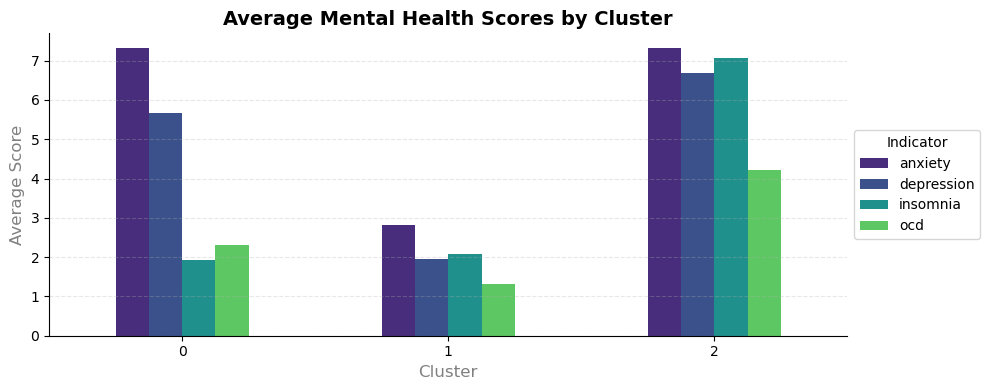

In [62]:
# Manually assigning colors from the Viridis palette
colors = ["#472D7B", "#3B518B", "#20908D", "#5DC863"]

# Limiting the number of colors if fewer variables are present
colors = colors[:len(cluster_profile.columns)]

# Visualizing cluster profiles
ax = cluster_profile.plot(kind='bar', figsize=(10, 4), color=colors)

plt.title("Average Mental Health Scores by Cluster", 
          fontsize=14, fontweight='bold')
plt.xlabel("Cluster", fontsize=12, color='gray')
plt.ylabel("Average Score", fontsize=12, color='gray')
plt.xticks(rotation=0)
plt.legend(title="Indicator", loc='center left', 
           bbox_to_anchor=(1, 0.5), fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine()
plt.tight_layout()
plt.show()


Three approximately equal-sized clusters were identified:

1. **Cluster 0**: High anxiety (7.33) and depression (5.66), but low insomnia (1.93) and moderate OCD (2.31).  
2. **Cluster 1**: Minimal values across all indicators (anxiety=2.81, depression=1.96, insomnia=2.07, OCD=1.32).  
3. **Cluster 2**: Most severe mental health issues (anxiety=7.33, depression=6.69, insomnia=7.07, OCD=4.22).22).

#### Distribution of Favorite Genres by Clusters

In [63]:
print("Distribution of Favorite Genres by Clusters:")

for i in range(k):
    print(f"\nCluster {i}:")
    
    genre_distribution = (
        df_with_clusters[df_with_clusters['cluster'] == i]['fav_genre']
        .value_counts(normalize=True) * 100
    )
    
    print(genre_distribution.round(1))


Distribution of Favorite Genres by Clusters:

Cluster 0:
fav_genre
Rock                29.9
Pop                 17.8
Metal                8.3
Hip hop              7.1
Folk                 6.6
Classical            5.0
Video game music     4.6
Country              3.7
K pop                3.3
EDM                  3.3
Rap                  2.9
R&B                  2.9
Jazz                 2.5
Lofi                 1.7
Latin                0.4
Name: proportion, dtype: float64

Cluster 1:
fav_genre
Rock                22.6
Pop                 14.0
Metal               11.9
Classical            9.1
R&B                  7.0
Video game music     7.0
EDM                  5.3
Rap                  4.5
K pop                4.1
Country              3.7
Hip hop              3.3
Jazz                 2.9
Folk                 2.1
Gospel               1.2
Latin                0.8
Lofi                 0.4
Name: proportion, dtype: float64

Cluster 2:
fav_genre
Rock                24.2
Metal               15.

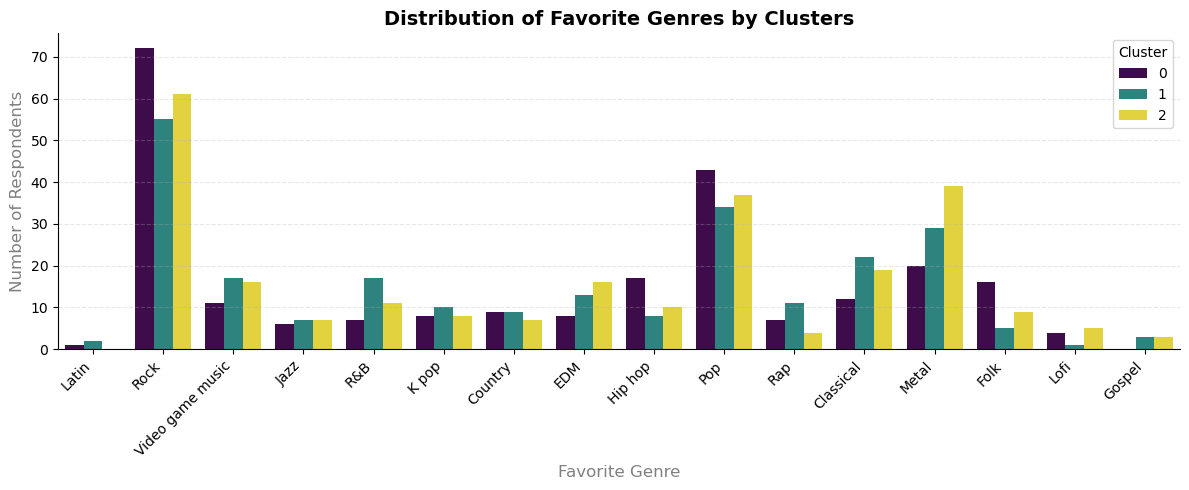

In [64]:
# Visualizing the distribution of favorite genres for each cluster
plt.figure(figsize=(12, 5))
sns.countplot(data=df_with_clusters, x='fav_genre', 
              hue='cluster', palette='viridis')
plt.title("Distribution of Favorite Genres by Clusters", 
          fontsize=14, fontweight='bold')
plt.xlabel("Favorite Genre", fontsize=12, color='gray')
plt.ylabel("Number of Respondents", fontsize=12, color='gray')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Cluster", fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()


- **Cluster 0**: Clearly dominated by **Rock (29.9%)** and **Pop (17.8%)**, followed by **Metal (8.3%)** and **Hip hop (7.1%)**.  
- **Cluster 1**: Again, **Rock (22.6%)** and **Pop (14%)** take the lead, but **Metal (11.9%)** and **Classical (9.1%)** are also noticeably present.  
- **Cluster 2**: The top three genres are **Rock (24.2%)**, **Metal (15.5%)**, and **Pop (14.7%)**, followed by **Classical (7.5%)** and **Video game music (6.3%)**.  

In all clusters, **Rock** consistently ranks first, but **Metal** is particularly prominent in Cluster 2, while **Classical** is more noticeable in Cluster 1.

### Musical Habits by Clusters

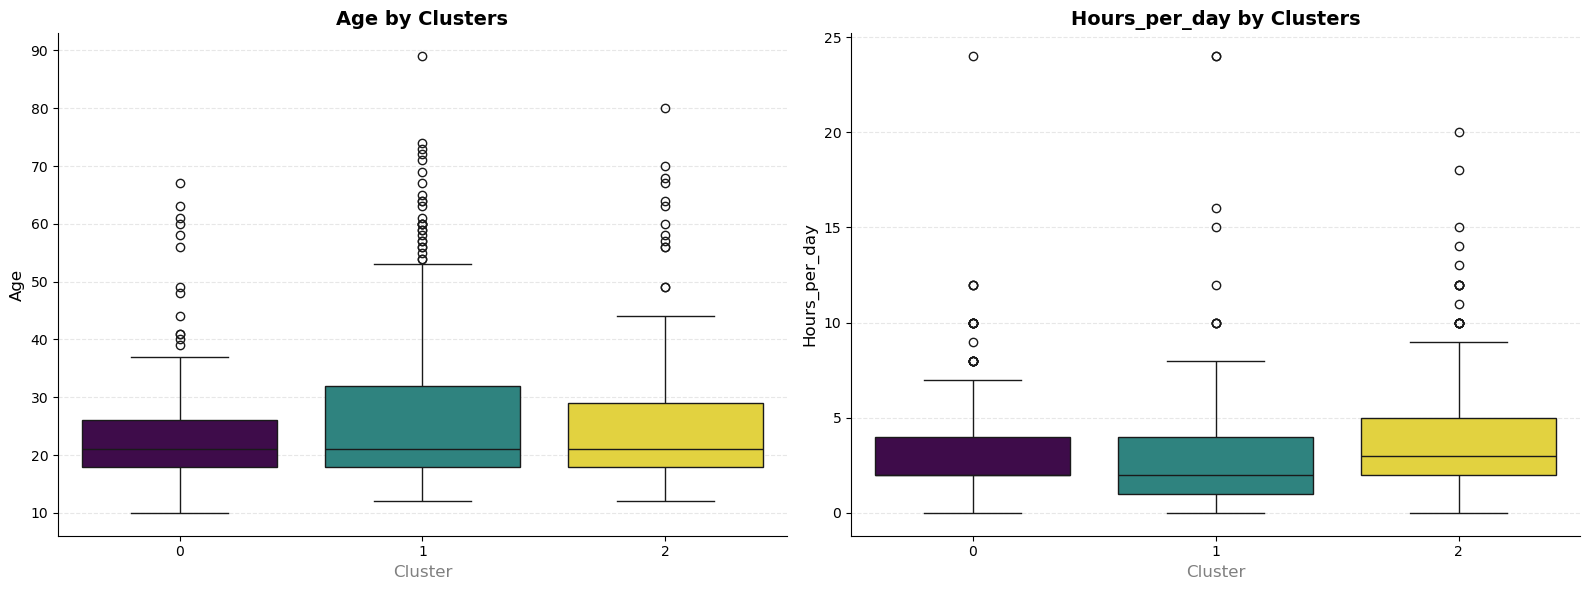

In [65]:
# Demographic Variables: Age and Hours per Day by Clusters
demographic_hours_vars = ['age', 'hours_per_day']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for i, var in enumerate(demographic_hours_vars):
    sns.boxplot(data=df_with_clusters, x='cluster', y=var, hue='cluster', 
                legend=False, palette='viridis', ax=axes[i])
    axes[i].set_title(f"{var.capitalize()} by Clusters", 
                      fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Cluster", fontsize=12, color='gray')
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)
    axes[i].set_ylabel(var.capitalize(), fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()



- **Age:**  
  - **Cluster 0** consists of generally younger respondents, with a wider range including some older participants.  
  - **Cluster 1** represents the "oldest" group, having the highest median age.  
  - **Cluster 2** falls in between but also includes some older outliers.
>
- **Hours_per_day:**  
  - **Cluster 0** and **Cluster 1** have similar medians (around 3 hours), though Cluster 1 has fewer outliers.  
  - **Cluster 2** listens to music slightly longer (median around 4 hours) and contains the highest number of extreme values with long listening times.

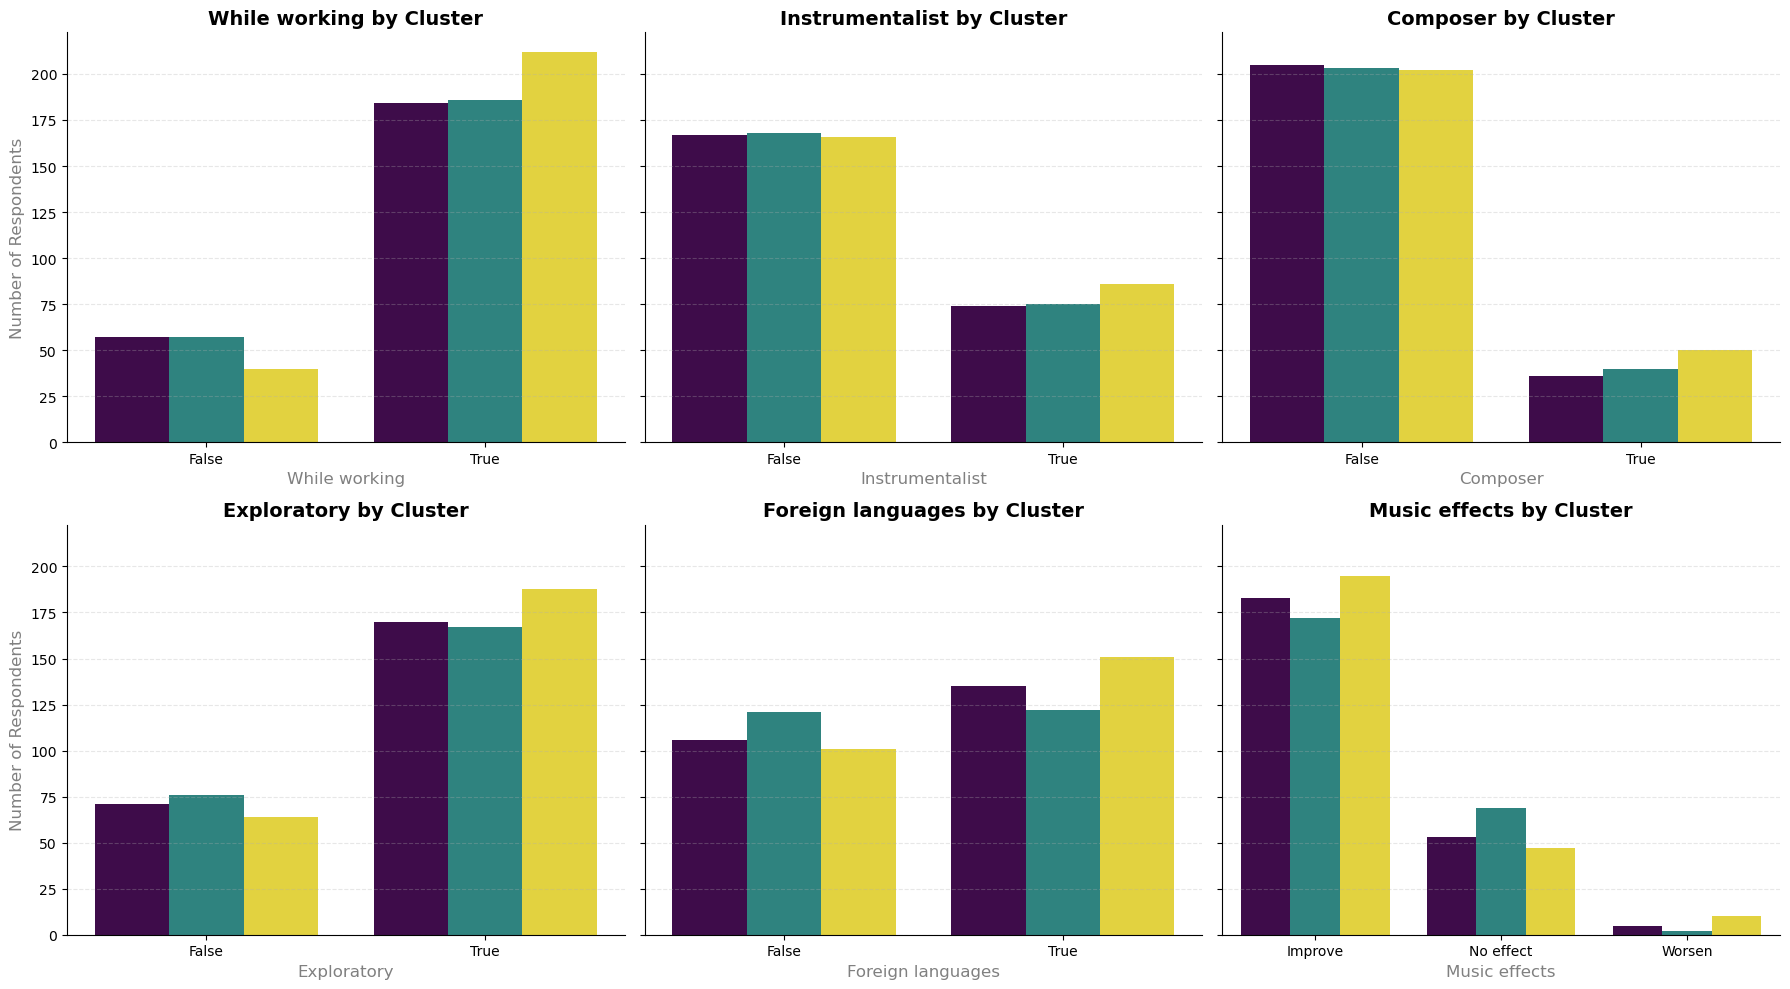

In [66]:
# Creating a Grid of Subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 5), sharey=True)
axes = axes.flatten()  # Convert the 2D array of axes into a 1D array

# Plotting countplots for each variable
for i, var in enumerate(binary_columns):
    sns.countplot(
        data=df_with_clusters,
        x=var,
        hue='cluster',
        palette='viridis',
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f"{var.replace('_', ' ').capitalize()} by Cluster", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var.replace('_', ' ').capitalize(), fontsize=12, color='gray')
    
    # Only show ylabel on the first column of each row
    if i % ncols == 0:
        axes[i].set_ylabel("Number of Respondents", fontsize=12, color='gray')
    else:
        axes[i].set_ylabel("")
    
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

# Remove extra axes if the number of variables is less than nrows * ncols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()


Overall, no significant differences in these musical habits were found between the three clusters: all groups listen to music while working at similar rates, explore new genres equally, and often prefer foreign-language music.

---

To determine whether the differences in the distribution of binary variables across clusters are statistically significant, we will conduct a **Chi-square test**. This test is appropriate for comparing categorical data (including binary variables) across groups.

In [67]:
for var in binary_columns:
    print(f"\nVariable: {var}")
    
    contingency_table = pd.crosstab(df_with_clusters[var], 
                                    df_with_clusters['cluster'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    print(f"p-value: {p:.4f}")
    
    if p < 0.05:
        print("Differences between clusters are significant.")
    else:
        print("Differences between clusters are not significant.")



Variable: while_working
p-value: 0.0520
Differences between clusters are not significant.

Variable: instrumentalist
p-value: 0.6528
Differences between clusters are not significant.

Variable: composer
p-value: 0.3331
Differences between clusters are not significant.

Variable: exploratory
p-value: 0.3328
Differences between clusters are not significant.

Variable: foreign_languages
p-value: 0.0919
Differences between clusters are not significant.

Variable: music_effects
p-value: 0.0221
Differences between clusters are significant.


Differences between clusters are statistically significant only for the variable *musical_effects*.

Let's examine the contingency table (proportions):

In [68]:
music_effects_distribution = pd.crosstab(df_with_clusters['music_effects'], 
                                         df_with_clusters['cluster'], 
                                         normalize='columns') * 100
music_effects_distribution.round(2)


cluster,0,1,2
music_effects,,,
Improve,75.93,70.78,77.38
No effect,21.99,28.40,18.65
Worsen,2.07,0.82,3.97



- In each cluster, the majority of respondents believe that music improves their condition (ranging from **70.78%** to **77.38%**).
- **Cluster 2** has the highest percentage of respondents reporting a worsening effect (**3.97%**), whereas in Cluster 1, this percentage is the lowest (**0.82%**).
- **Cluster 1** is also characterized by a higher proportion of respondents who report no effect from music (**28.40%**).

Thus, while the overwhelming majority of respondents across all clusters perceive music as having a positive influence, people in **Cluster 2** are more likely to report a negative effect.

---

## Interpretation and Final Conclusions  

In this study, we analyzed the relationships between musical preferences, habits, and mental health using survey data collected from late August to early November 2022 (approximately 2.5 months). The survey covered several hundred participants, most of whom were young people (average age — 25 years, median — 21 years).  

👤 **Profile of a Typical Respondent:**  
- Age between 18 and 28, listens to music for an average of **3–4 hours per day**.  
- Prefers **Spotify** (over 60%), followed by YouTube Music and Apple Music.  
- **79%** listen to music while working/studying, **71%** actively explore new genres, and **55%** listen to music in foreign languages.  
- Only a third play musical instruments, and less than **20%** create music themselves.  

🎵 **Main Genre Preferences:**  
- The most popular genres are **Rock** (188 respondents), **Pop** (114), and **Metal** (88). The least popular are **Gospel** and **Latin**.  
- The youngest listeners prefer **Rap, K-pop, and R&B**, while the most mature audience (by median age) favors **Gospel and Latin**, although the sample size is too small for definitive conclusions.  
- In terms of tempo (BPM), **Latin and Metal** lead (>150 beats per minute), while the slowest genres are **Folk and Gospel** (~100 BPM).  

💭 **Mental Health Indicators:**  
- The most common issues among respondents are anxiety (**Anxiety**, average 5.84 out of 10) and depression (**Depression**, 4.79 out of 10). Insomnia and OCD are less pronounced.  
- Moderate correlations were found between **Anxiety** and **Depression** (0.52), as well as between **Depression** and **Insomnia** (0.38).  

---

### Exploring Relationships 

Several important patterns have been identified between respondents' musical preferences, habits, and mental health:  

⏰ **Listening Hours** are statistically significantly associated with increased levels of **depression**, **insomnia**, and **OCD** (r ≈ 0.11–0.14). No significant effect on anxiety was found.  
- More time spent listening to music is linked to higher levels of depression, insomnia, and OCD. This could indicate that individuals experiencing psychological difficulties tend to use music as a coping mechanism, leading to increased listening hours.  
- However, the causality remains unclear: it is possible that pre-existing mental health issues result in more time spent listening to music rather than music consumption causing these issues.  
>

👤 **Age** is negatively correlated with anxiety, depression, and OCD levels. This aligns with general trends: as people age, they often become more emotionally resilient and better at managing stress.  
>

🎵 **Favorite Music Genre** shows minor differences in mental health indicators. For example:  
- Fans of **Folk**, **Hip-hop**, and **Lofi** tend to have higher-than-average anxiety and depression scores.  
- Listeners of **Classical**, **Country**, **Rap**, and **R&B** show lower scores, particularly in **insomnia** among **Rap** fans.  
- Statistically significant differences were found for **depression** and **insomnia** using ANOVA, but no specific pairwise differences between genres were confirmed, likely due to high data variability and small sample sizes for certain genres.  
>

🎚️ **Music Tempo (BPM)** has a weak correlation with anxiety and insomnia (r ≈ 0.07–0.08), but overall, BPM does not have a substantial impact on mental health.  
>

🎹 **Music Habits** revealed the following significant associations:  
- Listening to music while working is linked to **higher OCD levels**.  
- Composers are more likely to experience **insomnia**.  
- Regularly listening to music in foreign languages is associated with **higher anxiety and depression**.  
- The most notable effect is in **perceived impact**: those who believe music worsens their mental state actually show **higher levels** of all mental health indicators.  
>

📉 **Multifactorial models** confirmed that **age (older individuals tend to have better mental health) and listening hours (more hours linked to worse mental health indicators) are key factors** influencing mental well-being. However, the explained variance of these models is relatively low (4–7%), indicating the need to consider additional factors and check for multicollinearity.  
>

Overall, **musical factors have a moderate association with mental health, but their impact is limited**. A deeper understanding of these relationships will require a larger sample size and the inclusion of additional variables.  

---

### Clustering Results

We identified three clusters based on mental health indicators:  

- **Cluster 0:** High anxiety and depression but low insomnia.  
- **Cluster 1:** Minimal mental health issues, consisting of older participants who more often prefer the **Classical** genre.  
- **Cluster 2:** The most pronounced mental health issues (high anxiety, depression, insomnia, and OCD). This group listens to music for more than 4 hours a day, prefers **Metal**, and is the most likely to report a **negative impact** of music on their mental state (~4%).  
  

Statistically significant differences between clusters were found **only for the column *musical_effects*** (whether music has a positive, neutral, or negative effect on mental health).  

---

### Practical Recommendations

Based on the identified correlations, the following recommendations can be made for the application of music therapy:  

🧘‍♀️ **For reducing anxiety and depression:**  
   - Recommend genres with a slower tempo (BPM), such as **Classical, Country, R&B, and Rap**.  
   - Limit listening to genres associated with increased anxiety, such as **Folk, Hip hop, and Lofi**.  
>

😴 **For improving sleep:**  
   - Use genres linked to lower levels of insomnia, such as **Rap** or **Classical**.  
   - Avoid listening to music before bedtime, especially genres with a high tempo (e.g., **Metal, EDM**).  
>

⚖️ **For reducing OCD symptoms:**  
   - Encourage moderate music consumption, avoiding excessive listening (more than 5 hours per day).  
>

🎹 **For composers and musicians:**  
   - Recommend regular breaks in listening and music creation to reduce cognitive load and stress levels.

---  

### Study Limitations  

- **Self-reported data**: The results are based on respondents' subjective assessments, which may introduce bias.  
- **Sample size**: For some genres (e.g., **Gospel, Latin, Lofi**), the sample size is too small to draw reliable conclusions.  
- **Correlational nature**: This study does not establish causal relationships.  
- **Cultural and individual differences**: The impact of music on mental health may vary depending on cultural context and personal preferences.  

---

### Final Conclusion
The study identified weak but statistically significant associations between certain music habits and mental health indicators. The strongest correlations were observed between the number of hours spent listening to music and levels of **depression, insomnia, and OCD**. Some genres (**Folk, Lofi, Hip hop**) were linked to higher anxiety levels, while others (**Classical, Rap**) may have a more positive impact. However, the explanatory power of the models is limited (R² values do not exceed 7%), indicating that additional factors influencing mental health should be considered for more precise conclusions.  

The results partially align with existing theories in music therapy and research on music’s impact on mental health. It is well known that music can both improve and worsen emotional states depending on its characteristics (tempo, genre, personal preference). However, in this study, the observed associations were weak, which may be due to methodological limitations or specific sample characteristics.